<center> <h1> Income Evaluation</h1> </center>
<br/>
The goal of this project is to predict people's income categories, either '>50K' or '<=50K' based on various demographic attributes.<br/>

The dataset can be found here: [Adult income database](https://www.kaggle.com/wenruliu/adult-income-dataset)

### Table of Contents
* Get the Data
* Data Cleaning
* Exploratory Data Analysis
* Data Preprocessing
* Feature Selection and Clustering
* Classifiers
    * Logistic Regression
    * Decision Tree
    * Random Forests
    * Support Vector Classification
    * K-nearest Neighbors
    * Gaussian Naive Bayes
    * Quadratic Discriminant Analysis
    * AdaBoost
    * Gradient Boosting
    * Multi-layer Perceptron Classifier
 
### Imbalanced Dataset
Many learning algorithms were designed assuming well-balanced class distributions, i.e. no significant differences in class prior probabilities. However, this is not always the case in real world data since one class might be represented by a large number of examples, while the others are represented by only a few, and this is the case for this dataset. The target variable "income" has imbalanced distribution with about 25% being '>50K" and 75% being "<=50K". <br/>
<br/>
**The solution to the imbalanced data are mainly two types: data level methods and the algorithmic level methods.<br/>**
<br/>
**Data level methods**<br/>
Data level methods consist of balancing classes by resampling the original data set, such that under-represented classes are over-sampled, and over-represented classes are under-sampled.<br/>
1. Random over-sampling(non-heuristic method)<br/>
It aims to balance class distribution through the random replication of minority class examples. Since it makes exact copies of examples from the minority class, which can increase the likelihood of overfitting.<br/>
<br/>
2. Oversampling(heuristic method)<br/>
There are two approaches supported for generating new data points, Synthetic Minority Over-sampling Technique (SMOTE) and Adaptive Synthetic Sampling (ADASYN). Both techniques use interpolation to generate new datapoints. To be specific, SMOTE is an over-sampling method with synthetic data generation. Its main idea is to form new minority class examples by interpolating between several examples from the minority class that lie together. And ADASYN uses a weighted distribution for different minority class examples according to their level of difficulty in learning, where more synthetic data is generated for minority class examples that are harder to learn compared to those minority examples that are easier to learn.<br/>
<br/>

3. Random under-sampling(non-heuristic method)<br/>
It aims to balance class distribution through the random elimination of majority class examples. But there is critic that under-sampling can eventually discard data potentially important for learning.<br/>
<br/>
4. Undersampling(heuristic method)<br/>
Some heuristic under-sampling methods include NearMiss,Condensed Nearest Neighbor Rule,Tomek links, One-sided selection, Neighborhood Cleaning Rule. I implemented NearMiss, Tomek links and Neighborhood Cleaning Rule in this notebook.<br/>

**Algorithmic level methods:<br/>**
Idea:  adapting existing algorithms and techniques to the especial characteristics of imbalanced data. 
These proposals include cost-sensitive learning, one-class classifiers, and ensembles of classifiers, among others.

## Get the Data

In [1]:
#import packages
import os
from os import getcwd
getcwd()
import pandas as pd
import seaborn as sns
import numpy as np
import plotly as py
py.offline.init_notebook_mode(connected = True)
from plotly import graph_objs as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:\\Masters\\Projects\\Income Classification\\")

In [3]:
df = pd.read_csv('income_evaluation.csv')

In [4]:
print(df.shape)
df.head(2)

(48842, 15)


age workclass  fnlwgt education  educational-num      marital-status  \
0   25   Private  226802      11th                7       Never-married   
1   38   Private   89814   HS-grad                9  Married-civ-spouse   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   
1    Farming-fishing      Husband  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K

## Data Cleaning

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Column names have space in the front, need to rename them.

In [6]:
df.columns= ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

Replace the "?" in cells with NaN.

In [7]:
df.replace('?', np.nan, inplace=True)

In [8]:
#detect which cells have missing values, and then count how many there are in each column
missing_val_count_by_column = (df.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column > 0]

workclass         2799
occupation        2809
native_country     857
dtype: int64

In [9]:
#check how many uniques and nulls we got for all variables in a dataframe
def unique_null(df):
    unique = pd.DataFrame( df.nunique(), columns= ['unique#'] )
    null = pd.DataFrame( df.isnull().sum(), columns= ['null#'] )
    tb = pd.concat( [unique, null], axis = 1 )
    tb['observation#'] = df.shape[0]
    
    if tb['null#'].sum() > 0:
        tb = tb[['observation#','unique#', 'null#']].sort_values(by=['null#'], ascending = False)
    elif tb['unique#'].sum() != tb['observation#'].sum():
        tb = tb[['observation#','unique#', 'null#']].sort_values(by=['unique#'], ascending = True)
    else:
        tb = tb[['observation#','unique#', 'null#']].sort_index()

    return tb

In [10]:
unique_null(df)

observation#  unique#  null#
occupation             48842       14   2809
workclass              48842        8   2799
native_country         48842       41    857
fnlwgt                 48842    28523      0
education              48842       16      0
education_num          48842       16      0
age                    48842       74      0
marital_status         48842        7      0
relationship           48842        6      0
sex                    48842        2      0
race                   48842        5      0
capital_gain           48842      123      0
capital_loss           48842       99      0
hours_per_week         48842       96      0
income                 48842        2      0

Three attributes have missing values, let's take care of them one by one.

In [11]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

The counts for top few occupations are very close, impute them with "unknown" instead of the category with highest frequency.

In [12]:
df.occupation.fillna('unknown',inplace=True)

In [13]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [14]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [15]:
df.workclass.fillna('Private',inplace=True)

In [16]:
df.workclass.value_counts()

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [17]:
df.native_country.value_counts()

native_country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador      

In [18]:
df.native_country.fillna('United-States',inplace=True)

In [19]:
unique_null(df)

observation#  unique#  null#
income                 48842        2      0
sex                    48842        2      0
race                   48842        5      0
relationship           48842        6      0
marital_status         48842        7      0
workclass              48842        8      0
occupation             48842       15      0
education              48842       16      0
education_num          48842       16      0
native_country         48842       41      0
age                    48842       74      0
hours_per_week         48842       96      0
capital_loss           48842       99      0
capital_gain           48842      123      0
fnlwgt                 48842    28523      0

No more missing value!

## Exploratory Data Analysis

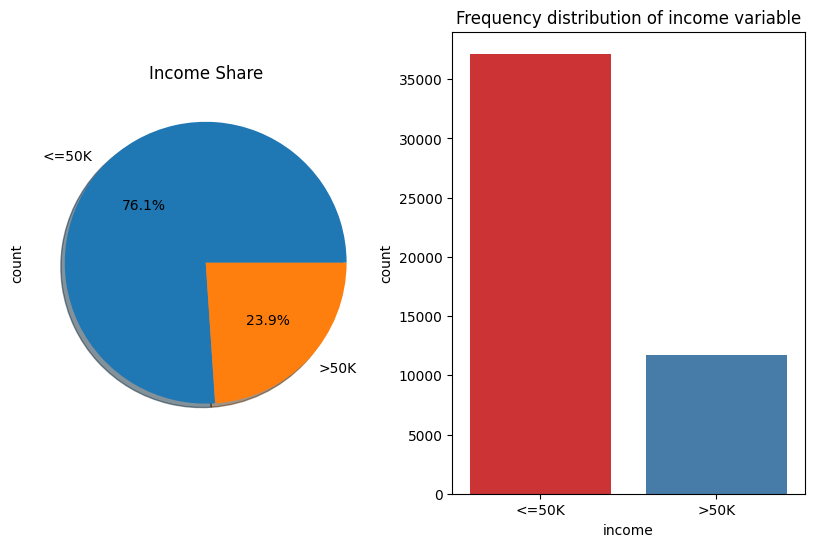

In [20]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(10,6))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')

ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

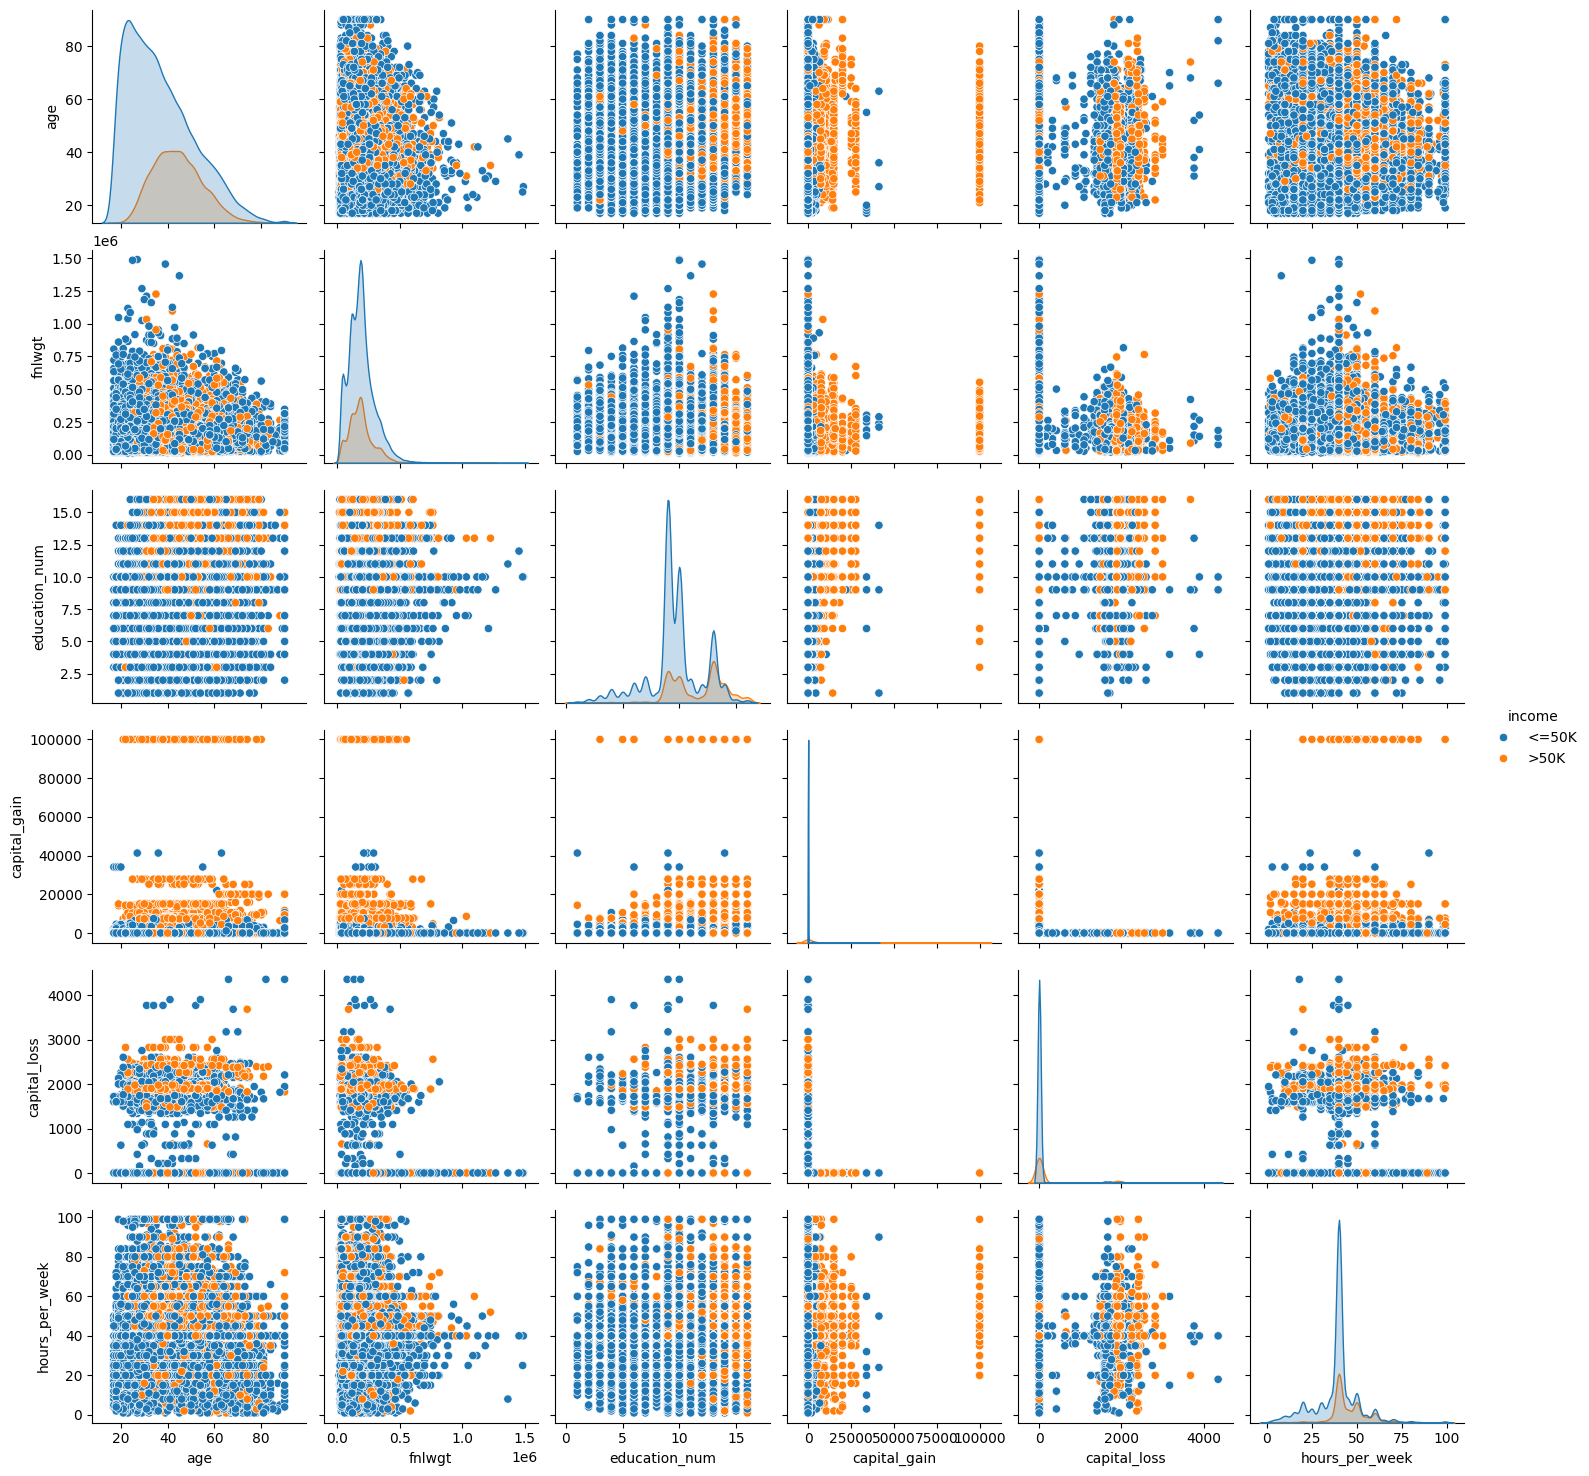

In [21]:
sns.pairplot(df, hue = "income")

Numerical variables

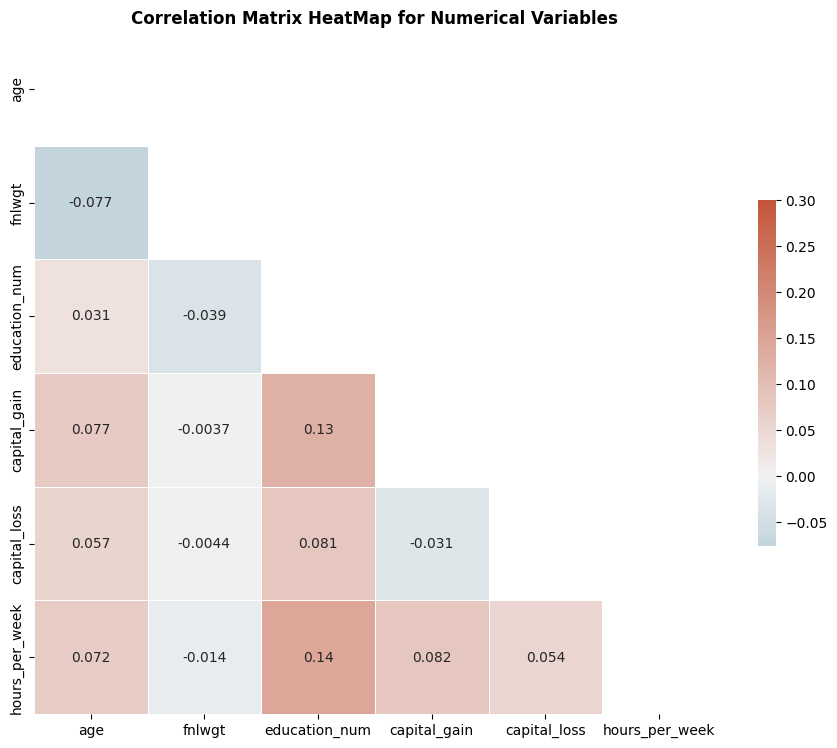

In [22]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix HeatMap for Numerical Variables", fontweight="bold")
plt.show()

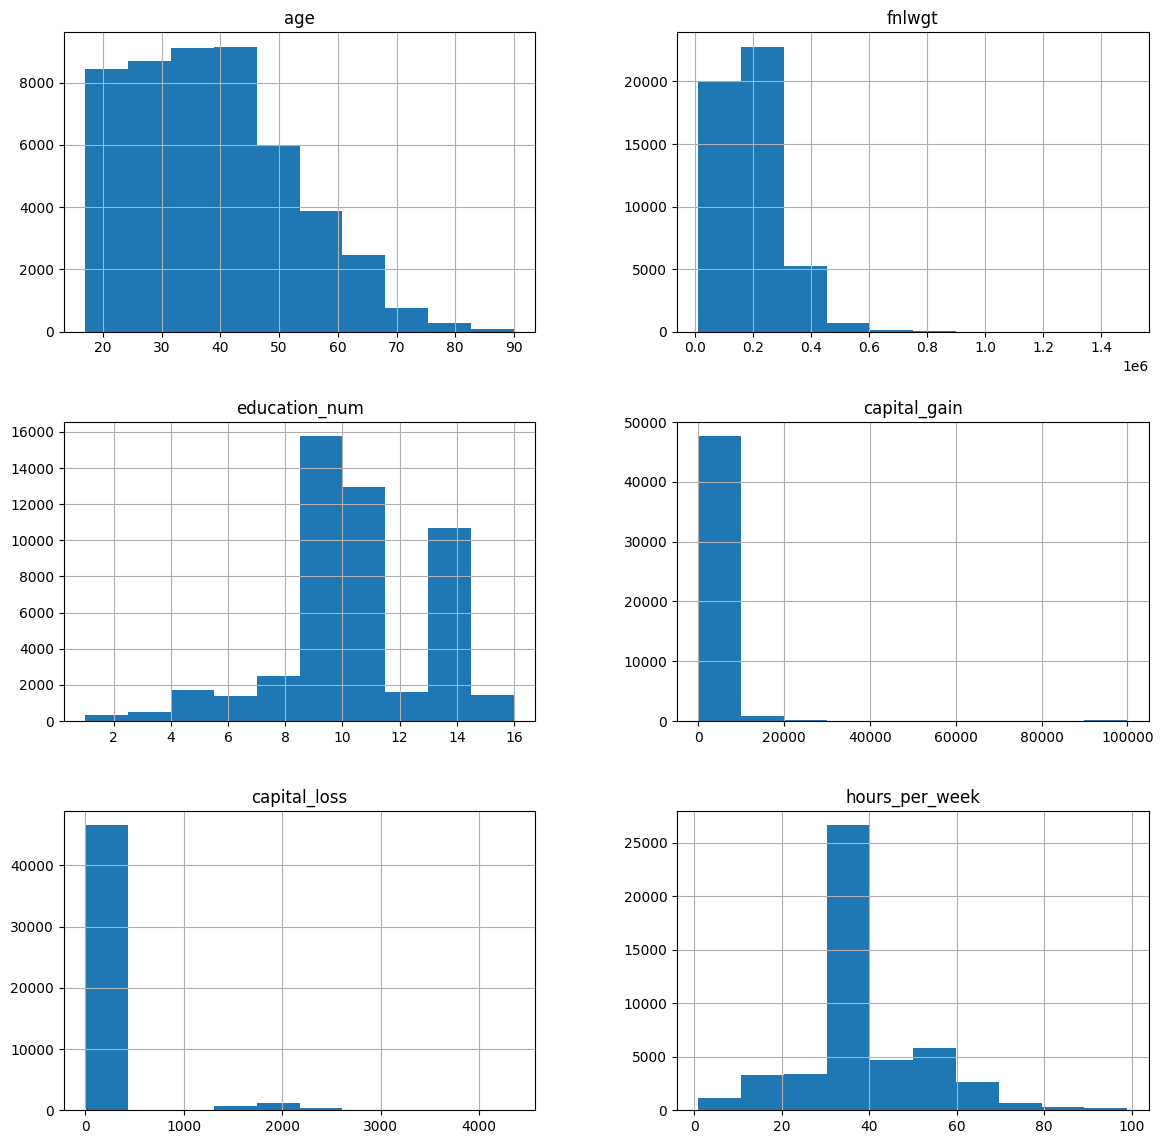

In [23]:
#numerical attributes distribution
p = df.hist(figsize = (14,14))

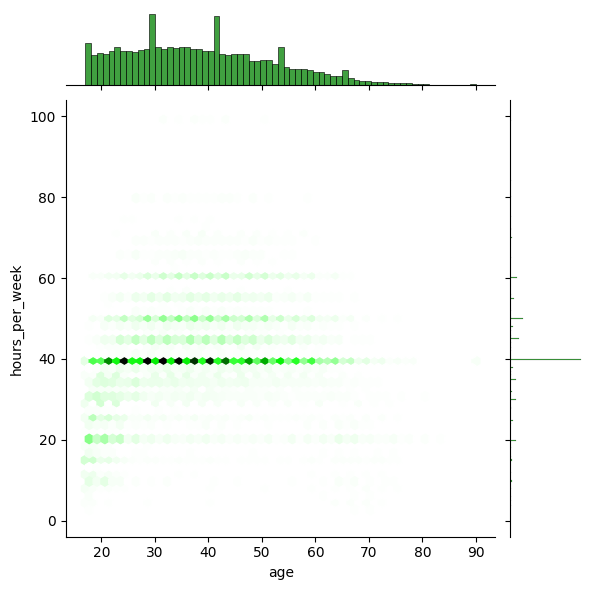

In [24]:
sns.jointplot(x='age',y='hours_per_week',data=df,kind='hex',color='Green')

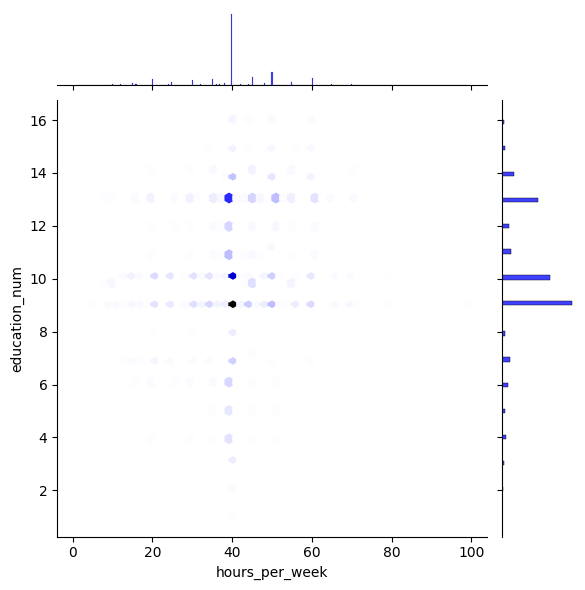

In [25]:
sns.jointplot(x='hours_per_week',y='education_num',data=df,kind='hex',color='blue')

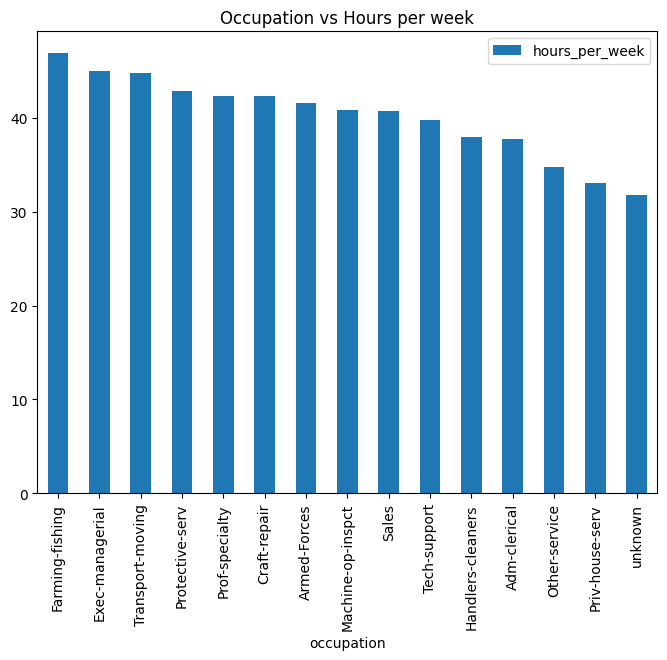

In [26]:
df1 = pd.DataFrame(df.groupby(['occupation'])['hours_per_week'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Occupation vs Hours per week')
plt.show()

Categorical variables

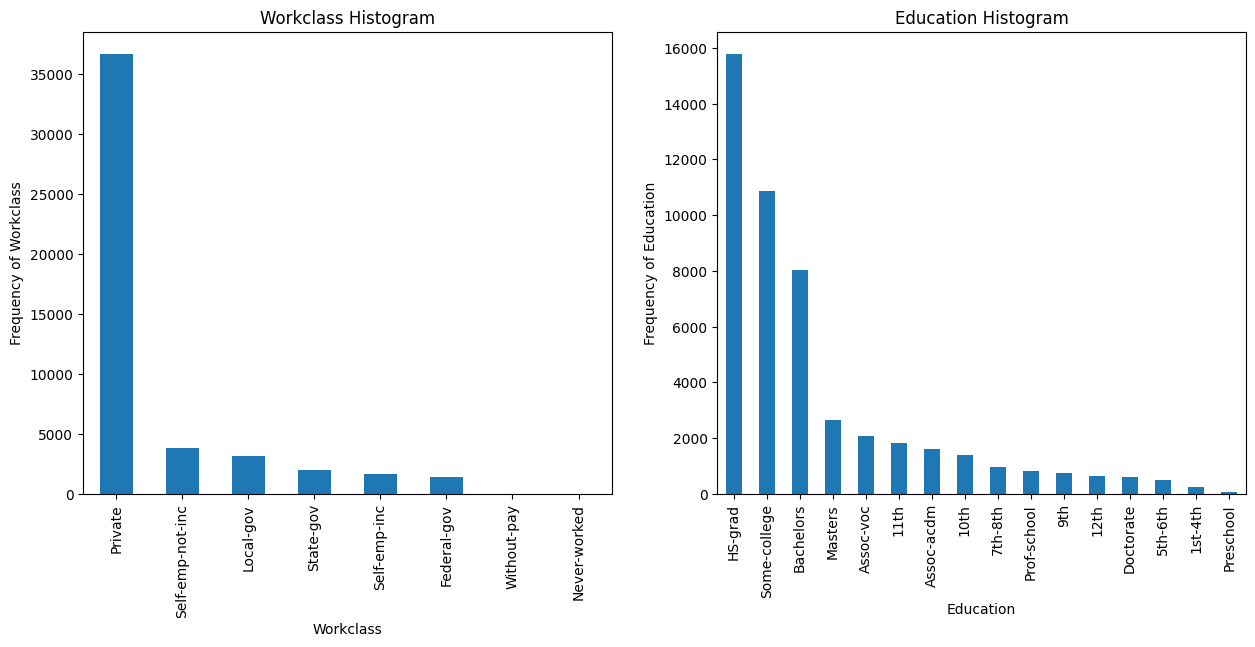

In [27]:
plt.figure(figsize=(15,6))

# Workclass Histogram
plt.subplot(1,2,1)
plt1 = df.workclass.value_counts().plot(kind='bar')  # FIX: Use kind='bar'
plt.title('Workclass Histogram')
plt1.set(xlabel='Workclass', ylabel='Frequency of Workclass')

# Education Histogram
plt.subplot(1,2,2)
plt1 = df.education.value_counts().plot(kind='bar')  # FIX: Use kind='bar'
plt.title('Education Histogram')
plt1.set(xlabel='Education', ylabel='Frequency of Education')

plt.show()

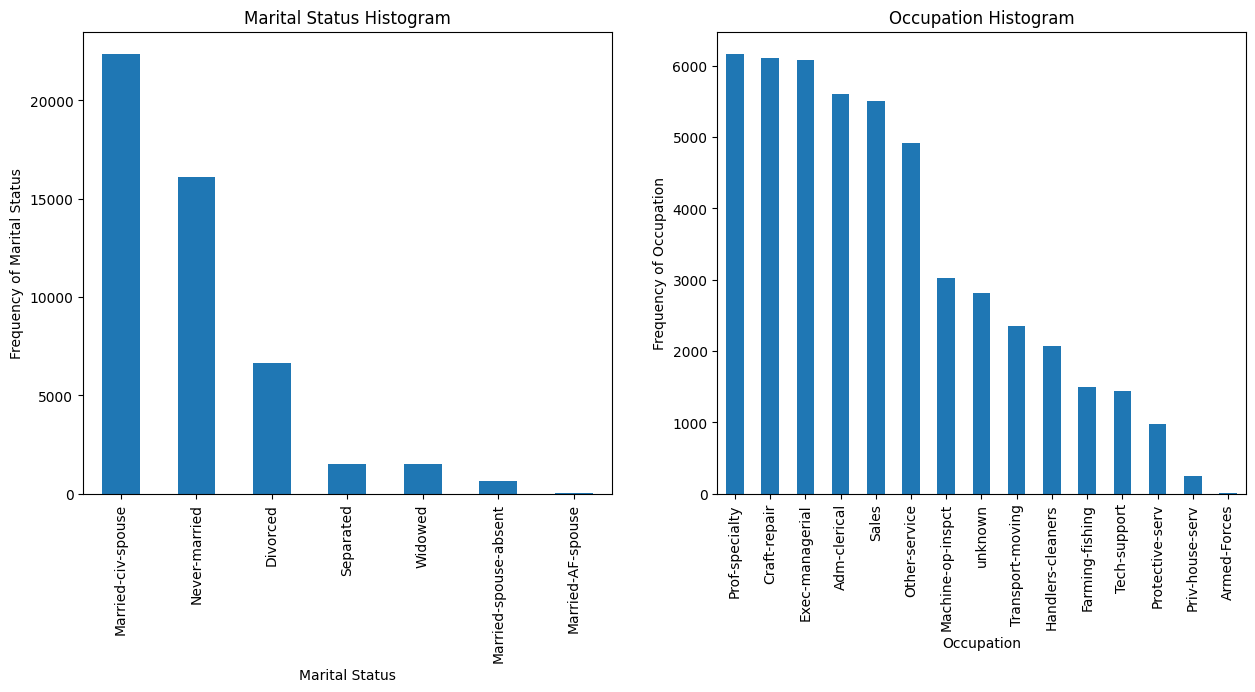

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

#Marital Status Histogram
plt.subplot(1,2,1)
plt1 = df.marital_status.value_counts().plot(kind='bar')  # FIX: Use kind='bar'
plt.title('Marital Status Histogram')
plt1.set(xlabel='Marital Status', ylabel='Frequency of Marital Status')

#Occupation Histogram
plt.subplot(1,2,2)
plt1 = df.occupation.value_counts().plot(kind='bar')  # FIX: Use kind='bar'
plt.title('Occupation Histogram')
plt1.set(xlabel='Occupation', ylabel='Frequency of Occupation')

plt.show()


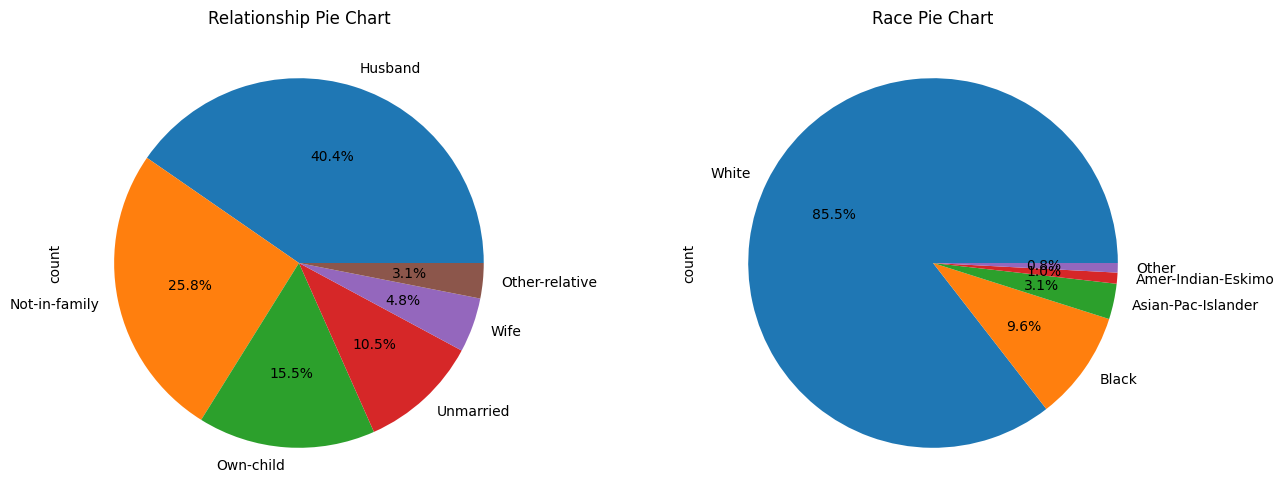

In [29]:
plt.figure(figsize=(15,6))

# Relationship Pie Chart
plt.subplot(1,2,1)
plt1 = df.relationship.value_counts().plot(kind='pie', autopct='%1.1f%%')  # FIX: Use kind='pie'
plt.title('Relationship Pie Chart')

# Race Pie Chart
plt.subplot(1,2,2)
plt1 = df.race.value_counts().plot(kind='pie', autopct='%1.1f%%')  # FIX: Use kind='pie'
plt.title('Race Pie Chart')

plt.show()


Numerical and categorical variables' relationships with target variable "income"

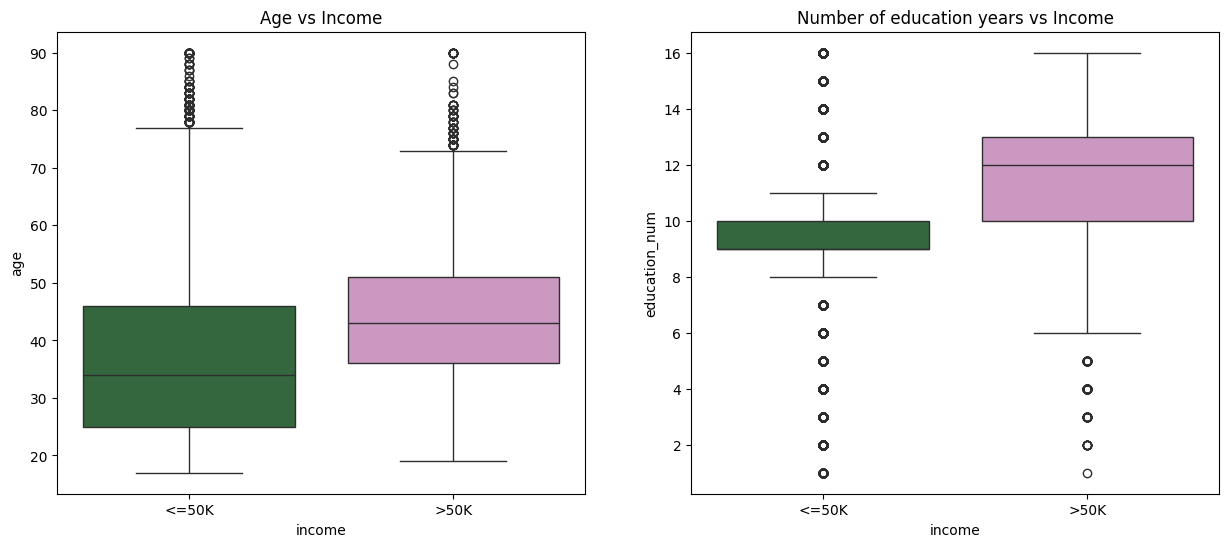

In [30]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Age vs Income')
sns.boxplot(x=df.income, y=df.age, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Number of education years vs Income')
sns.boxplot(x=df.income, y=df.education_num, palette=("cubehelix"))

plt.show()

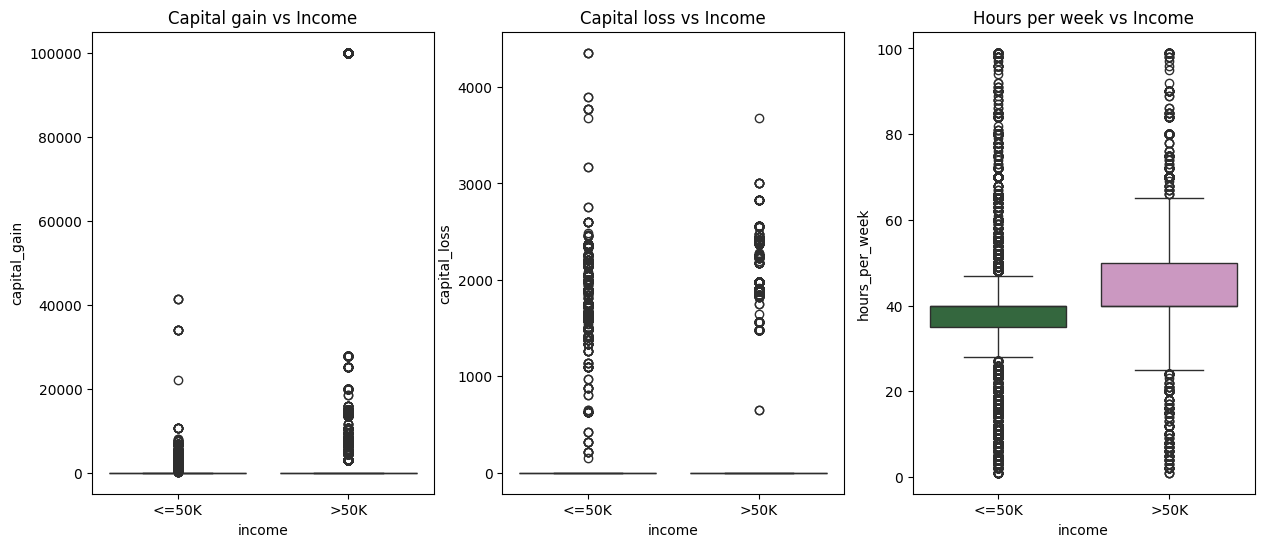

In [31]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title('Capital gain vs Income')
sns.boxplot(x=df.income, y=df.capital_gain, palette=("cubehelix"))

plt.subplot(1,3,2)
plt.title('Capital loss vs Income')
sns.boxplot(x=df.income, y=df.capital_loss, palette=("cubehelix"))

plt.subplot(1,3,3)
plt.title('Hours per week vs Income')
sns.boxplot(x=df.income, y=df.hours_per_week, palette=("cubehelix"))

plt.show()

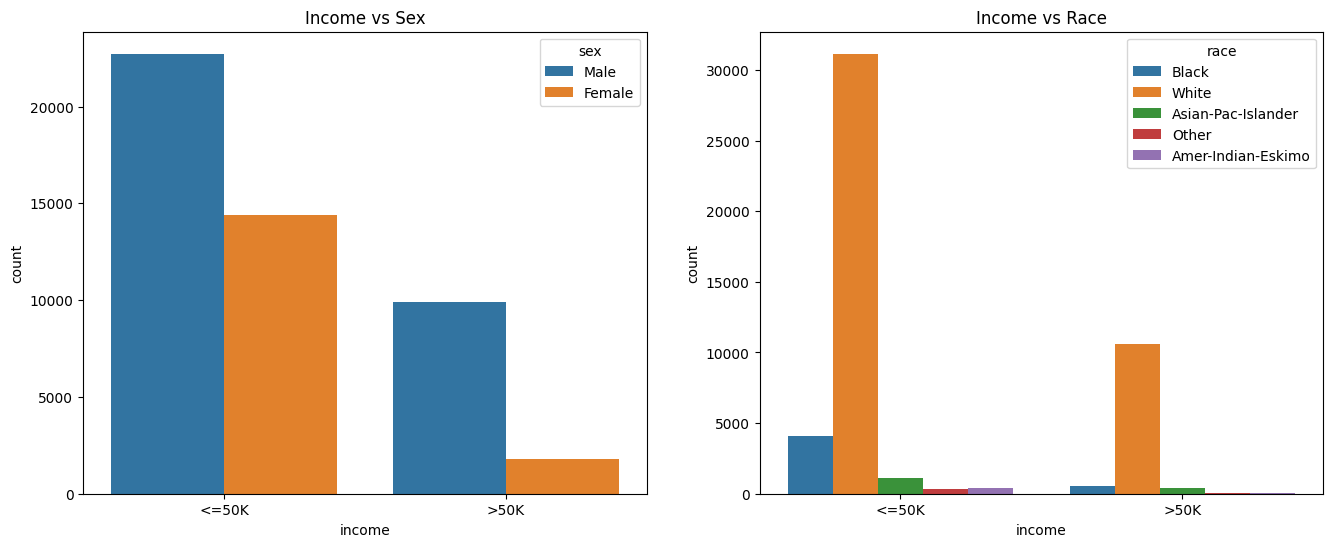

In [32]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Income vs Sex')
sns.countplot(x="income", hue="sex", data=df)

plt.subplot(1,2,2)
plt.title('Income vs Race')
sns.countplot(x="income", hue="race", data=df)

plt.show()

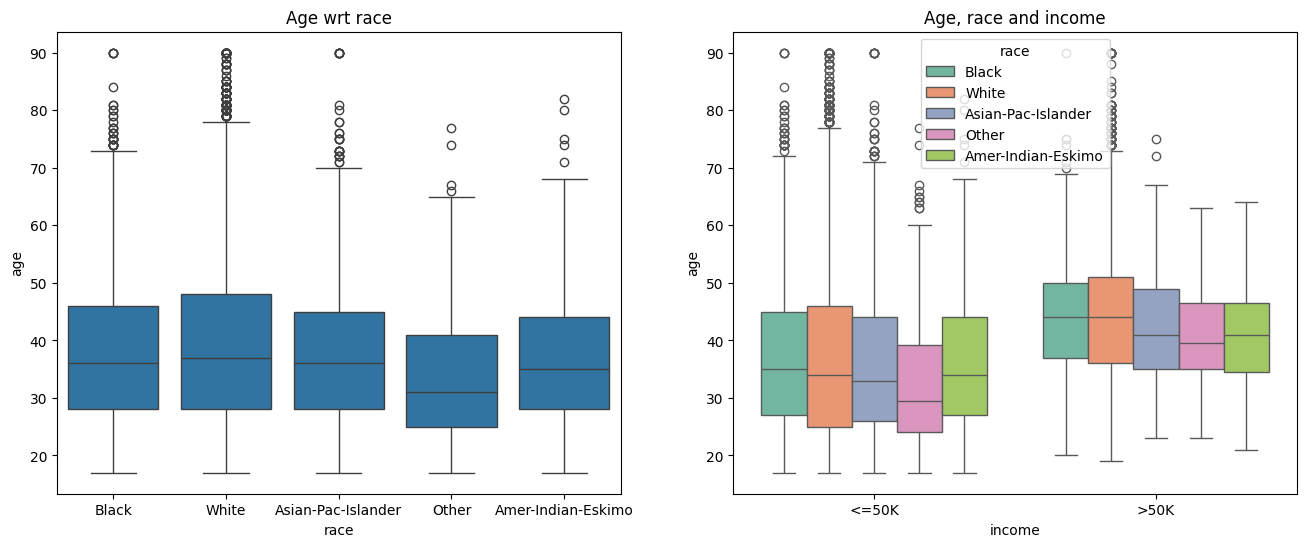

In [33]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title("Age wrt race")
sns.boxplot(x ='race', y="age", data = df)

plt.subplot(1,2,2)
plt.title("Age, race and income")
sns.boxplot(x="income", y="age", hue="race",
                 data=df, palette="Set2")
plt.show()

<Axes: xlabel='count', ylabel='workclass'>

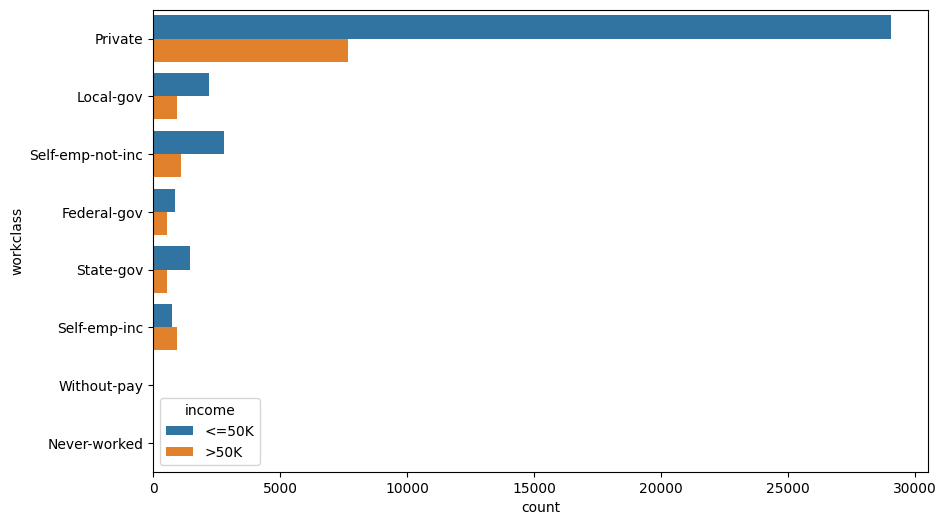

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(y="workclass", hue="income", data=df)

Priveate workclass has much higher income in both classes.

<Axes: xlabel='count', ylabel='education'>

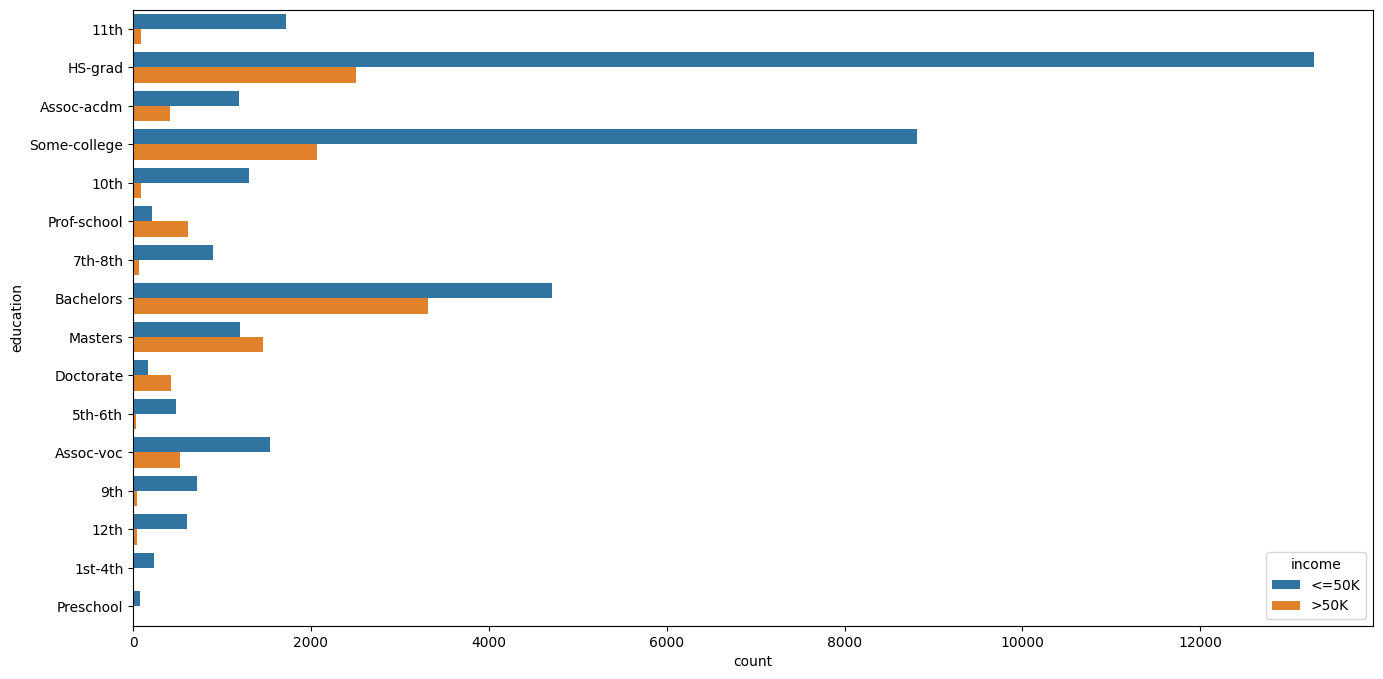

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(y="education",hue="income",data=df)

Among people who has higher education types such as masters,doctorate,prof-school, they tend to have higher income.
But getting higher degree is not a necessity for high income. Compared to people who has masters,doctorate,prof-school, people who has degree in bachelor, high school,college, have higher counts for ">50K".

<Axes: xlabel='count', ylabel='marital_status'>

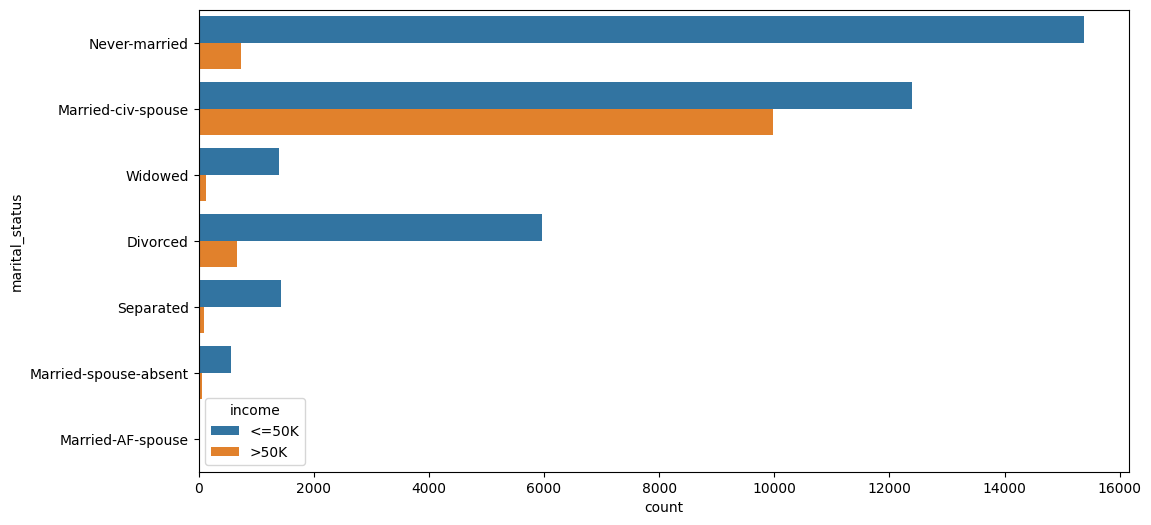

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(y="marital_status",hue="income",data=df)

<Axes: xlabel='count', ylabel='relationship'>

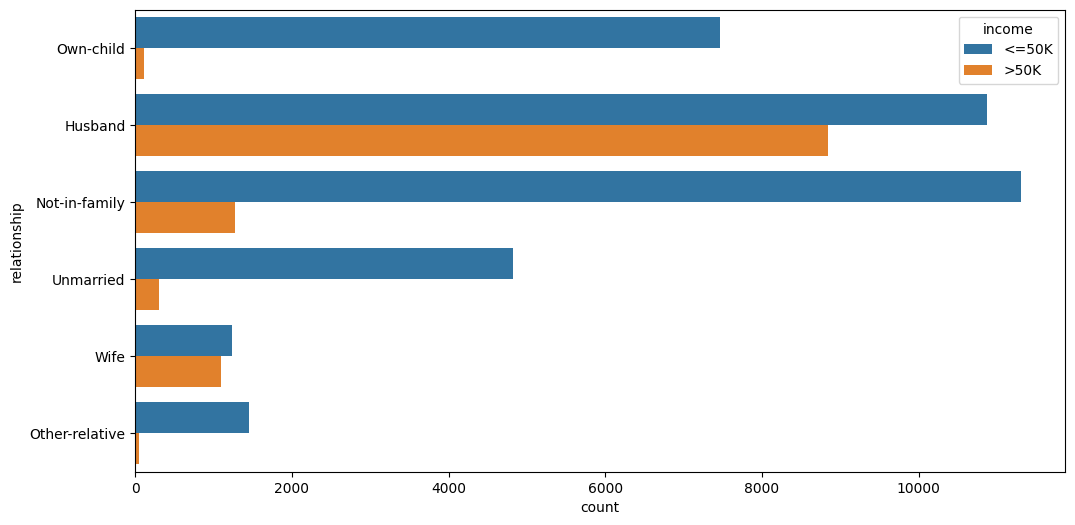

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(y="relationship",hue="income",data=df)

<Axes: xlabel='count', ylabel='income'>

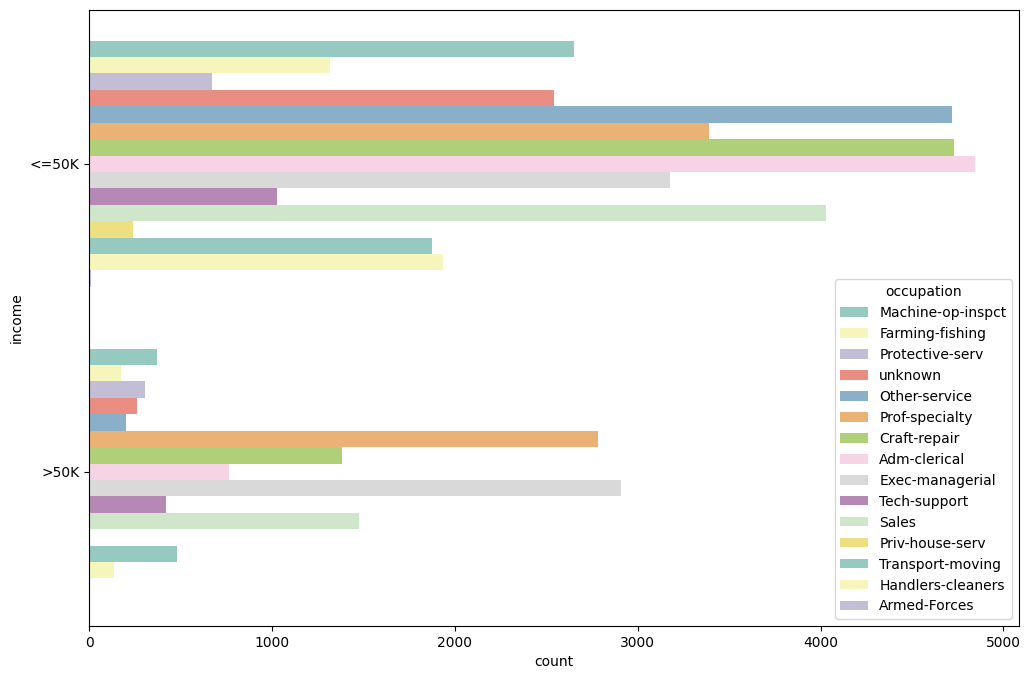

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(y="income", hue="occupation", data=df, palette="Set3")

In [39]:
df[df['income']=='<=50K']['age'].mean()

np.float64(36.87218409366169)

In [40]:
df[df['income']=='>50K']['age'].mean()

np.float64(44.275177547702576)

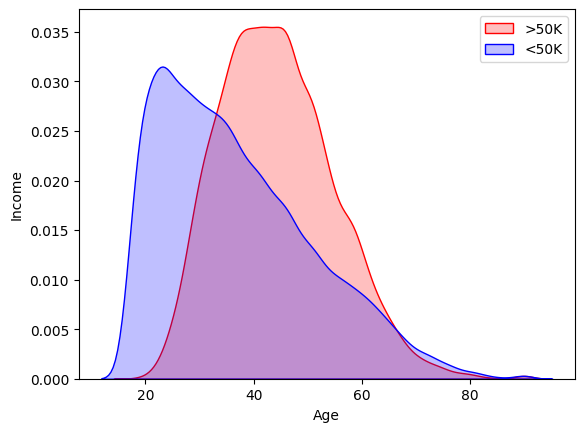

In [41]:
# Explore Age distibution 
g = sns.kdeplot(df["age"][(df["income"] == '>50K')], color="Red", shade = True)
g = sns.kdeplot(df["age"][(df["income"] == "<=50K")], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Income")
g = g.legend([">50K","<50K"])

In [42]:
df[df['income'] == '<=50K']['hours_per_week'].mean()

np.float64(38.84004844570045)

In [43]:
df[df['income'] == '>50K']['hours_per_week'].mean()

np.float64(45.45289638059382)

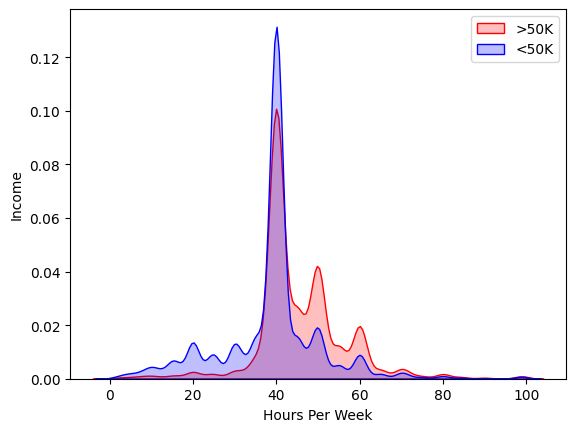

In [44]:
g = sns.kdeplot(df["hours_per_week"][(df["income"] == '>50K')], color="Red", shade = True)
g = sns.kdeplot(df["hours_per_week"][(df["income"] == "<=50K")], ax =g, color="Blue", shade= True)
g.set_xlabel("Hours Per Week")
g.set_ylabel("Income")
g = g.legend([">50K","<50K"])

In [45]:
df[df['income'] == '<=50K']['education_num'].mean()

np.float64(9.598492800430629)

In [46]:
df[df['income'] == '>50K']['education_num'].mean()

np.float64(11.602806537178061)

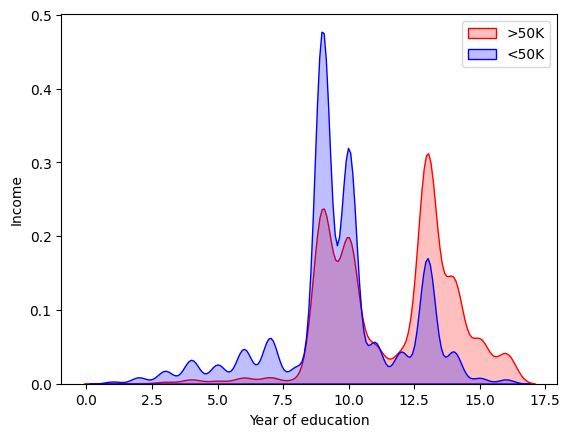

In [47]:
g = sns.kdeplot(df['education_num'][(df["income"] == '>50K')], color="Red", shade = True)
g = sns.kdeplot(df['education_num'][(df["income"] == "<=50K")], ax =g, color="Blue", shade= True)
g.set_xlabel("Year of education")
g.set_ylabel("Income")
g = g.legend([">50K","<50K"])

# Data Preprocessing

One hot encode categorical variables and scale numerical variables to [0,1].

In [48]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df = dummies('workclass',df)
df = dummies('education',df)
df = dummies('marital_status',df)
df = dummies('occupation',df)
df = dummies('relationship',df)
df = dummies('race',df)
df = dummies('sex',df)
df = dummies('native_country',df)

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['age','education_num','hours_per_week','capital_gain', 'capital_loss','fnlwgt']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [50]:

# Separate features and target
X = df.drop(['income'], axis=1)

# Convert 'income' column to binary labels (0 and 1)
df['income'] = df['income'].map({'<=50K': 1, '>50K': 0})  # Mapping categories to binary labels

# Assign target variable
y = df['income']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# getting the shapes
print("Shape of x_train :", X_train.shape)
print("Shape of x_test :",X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (34189, 98)
Shape of x_test : (14653, 98)
Shape of y_train : (34189,)
Shape of y_test : (14653,)


In [52]:
X_train.head(6)

age    fnlwgt  education_num  capital_gain  capital_loss  \
3833   0.136986  0.080525       0.600000      0.000000           0.0   
34743  0.342466  0.240339       0.333333      0.000000           0.0   
2022   0.205479  0.017504       0.666667      0.072981           0.0   
1580   0.260274  0.092427       0.600000      0.000000           0.0   
4612   0.164384  0.234671       0.533333      0.000000           0.0   
36314  0.136986  0.080185       0.733333      0.000000           0.0   

       hours_per_week  Local-gov  Never-worked  Private  Self-emp-inc  ...  \
3833         0.397959       True         False    False         False  ...   
34743        0.428571      False         False     True         False  ...   
2022         0.704082      False         False    False         False  ...   
1580         0.602041      False         False     True         False  ...   
4612         0.295918      False         False     True         False  ...   
36314        0.397959      False         False     True         False  ...   

       Portugal  Puerto-Rico  Scotland  South  Taiwan  Thailand  \
3833      False        False     False  False   False     False   
34743     False        False     False  False   False     False   
2022      False        False     False  False   False     False   
1580      False        False     False  False   False     False   
4612      False        False     False  False   False     False   
36314     False        False     False  False   False     False   

       Trinadad&Tobago  United-States  Vietnam  Yugoslavia  
3833             False           True    False       False  
34743            False           True    False       False  
2022             False           True    False       False  
1580             False           True    False       False  
4612             False           True    False       False  
36314            False           True    False       False  

[6 rows x 98 columns]

# Feature Selection and Clustering

Use RandomForestClassifier for feature selection.

In [53]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [54]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

fnlwgt                        1.694378e-01
age                           1.628991e-01
capital_gain                  1.001663e-01
hours_per_week                8.495695e-02
Married-civ-spouse            6.660920e-02
                                  ...     
Laos                          3.588233e-05
Honduras                      2.870598e-05
Outlying-US(Guam-USVI-etc)    2.015181e-05
Never-worked                  3.120270e-06
Holand-Netherlands            6.521382e-07
Length: 98, dtype: float64

Use K-means for clustering. When plotting the inertia as a function of the number of clusters. The inertia drops very quickly as the number of clusters increase up to 4, but it decreases much more slowly as the clusters increase. Thus I picked the the inflexion point, the "elbow" at the number of clusters=4.

In [55]:
from sklearn.cluster import KMeans
X1 = df[['fnlwgt','age','capital_gain']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

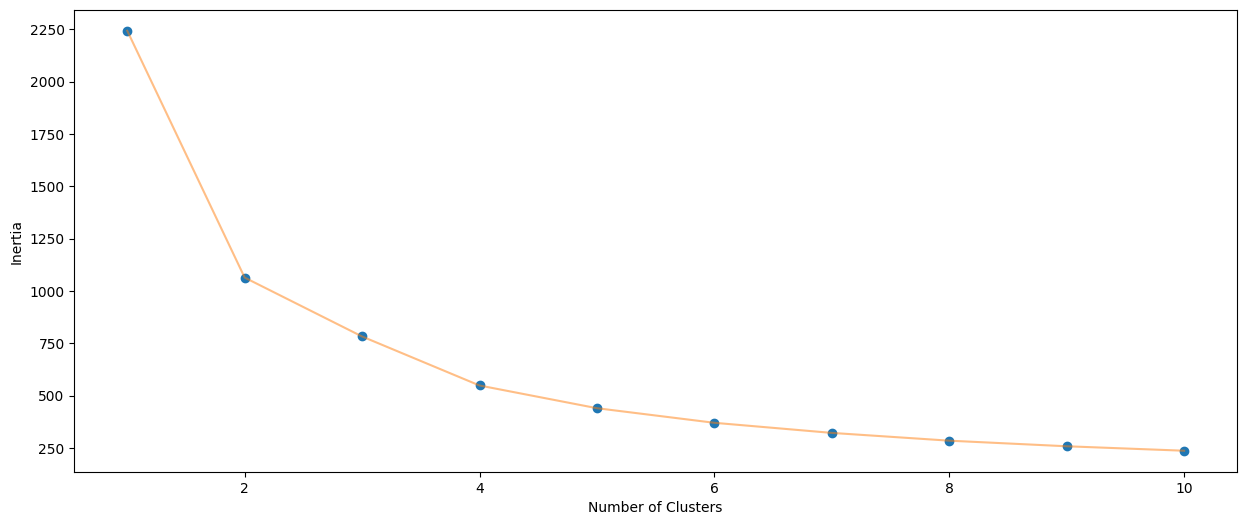

In [56]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [57]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [58]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['age'],
    y= df['fnlwgt'],
    z= df['education_num'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'fnlwgt'),
            yaxis = dict(title  = 'age'),
            zaxis = dict(title  = 'capital_gain')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

The target variable "income" has only two categories in this dataset, either ">50K" or "<=50K", but in reality it can be divided into many more categories, for example, 40K,60K,80K,100K, 4 categories in total. But from the plot, we can see that there is no clear boundary for each cluster.

# Classifiers
Simple classifiers, weighted classifiers, oversampling, undersampling

Build a pipeline for trying various sampling methods

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

def model_resampling_pipeline(X_train, X_test, y_train, y_test, model):
    results = {'ordinary': {}, 'class_weight': {}, 'oversample': {}, 'undersample': {}}

    # Function to train and evaluate a model
    def train_and_evaluate(X_resampled, y_resampled, label):
        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions, average='binary')
        conf_matrix = metrics.confusion_matrix(y_test, predictions)
        tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.shape == (2, 2) else (None, None, None, None)
        fpr, tpr, _ = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        return {
            'accuracy': accuracy, 'precision': precision, 'recall': recall,
            'fscore': fscore, 'n_occurences': support, 'predictions_count': Counter(predictions),
            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn, 'auc': auc
        }

    # 1️⃣ ------ No Resampling (Baseline) ------
    print("✅ Running Baseline Model Without Resampling...")
    results['ordinary'] = train_and_evaluate(X_train, y_train, 'ordinary')

    # 2️⃣ ------ Class Weight Adjustments ------
    if 'class_weight' in model.get_params().keys():
        print("✅ Running Model with Class Weight Balancing...")
        model.set_params(class_weight='balanced')
        results['class_weight'] = train_and_evaluate(X_train, y_train, 'class_weight')

    # 3️⃣ ------------ OVERSAMPLING ------------
    oversample_methods = [RandomOverSampler(), SMOTE(), ADASYN()]
    
    print("\n📢 Applying Oversampling Techniques...")
    for sampler in oversample_methods:
        technique = sampler.__class__.__name__
        print(f"🔹 {technique}: Before = {sorted(Counter(y_train).items())}")

        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f"   ➡ After = {sorted(Counter(y_resampled).items())}")

        results['oversample'][technique] = train_and_evaluate(X_resampled, y_resampled, technique)

    # 4️⃣ ------------ UNDERSAMPLING ------------
    undersample_methods = [
        RandomUnderSampler(),
        NearMiss(version=1),
        NearMiss(version=2),
        TomekLinks(),
        EditedNearestNeighbours()
    ]

    print("\n📢 Applying Undersampling Techniques...")
    for sampler in undersample_methods:
        technique = sampler.__class__.__name__
        if isinstance(sampler, NearMiss): technique += f" (v{sampler.version})"

        print(f"🔹 {technique}: Before = {sorted(Counter(y_train).items())}")

        try:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
            print(f"   ➡ After = {sorted(Counter(y_resampled).items())}")

            results['undersample'][technique] = train_and_evaluate(X_resampled, y_resampled, technique)

        except Exception as e:
            print(f"⚠️ Skipping {technique} due to error: {e}")
            results['undersample'][technique] = None

    return results



Build tool to visualize results

In [60]:
import matplotlib.pyplot as plt

def evaluate_method(results, method, metrics=['precision', 'recall', 'fscore']):
    fig, ax = plt.subplots(1, 7, sharey=True, figsize=(16, 6))
    
    for i, metric in enumerate(metrics):
        ax[i*2].axhline(results['ordinary'][metric], label='No Resampling', linestyle='--', color='blue')
        ax[i*2+1].axhline(results['ordinary'][metric], label='No Resampling', linestyle='--', color='blue')

        if results['class_weight']:
            ax[i*2].bar(0, results['class_weight'][metric], label='Adjust Class Weight', color='orange')
            ax[i*2+1].bar(0, results['class_weight'][metric], label='Adjust Class Weight', color='orange')

        for j, (technique, result) in enumerate(results[method].items()):
            ax[i*2].bar(j+1, result[metric], label=technique)
            ax[i*2+1].bar(j+1, result[metric], label=technique)

        ax[i*2].set_title(f'>50K: \n{metric}')
        ax[i*2+1].set_title(f'<=50K: \n{metric}')

    # AUC visualization
    ax[6].set_title('Area under curve')
    ax[6].axhline(results['ordinary']['auc'], label='No Resampling', linestyle='--', color='blue')

    if results['class_weight']:
        ax[6].bar(0, results['class_weight']['auc'], label='Adjust Class Weight', color='orange')

    for j, (technique, result) in enumerate(results[method].items()):
        ax[6].bar(j+1, result['auc'], label=technique)

    # ✅ Clean & well-aligned legend
    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.08),
               ncol=len(labels), fancybox=True, shadow=True, fontsize=10)

    plt.show()


# Logistic Regression

In [61]:
model = LogisticRegression()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

✅ Running Baseline Model Without Resampling...
✅ Running Model with Class Weight Balancing...

📢 Applying Oversampling Techniques...
🔹 RandomOverSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 SMOTE: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 ADASYN: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26517), (1, 26017)]

📢 Applying Undersampling Techniques...
🔹 RandomUnderSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v1): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v2): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 TomekLinks: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 24271)]
🔹 EditedNearestNeighbours: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 18983)]


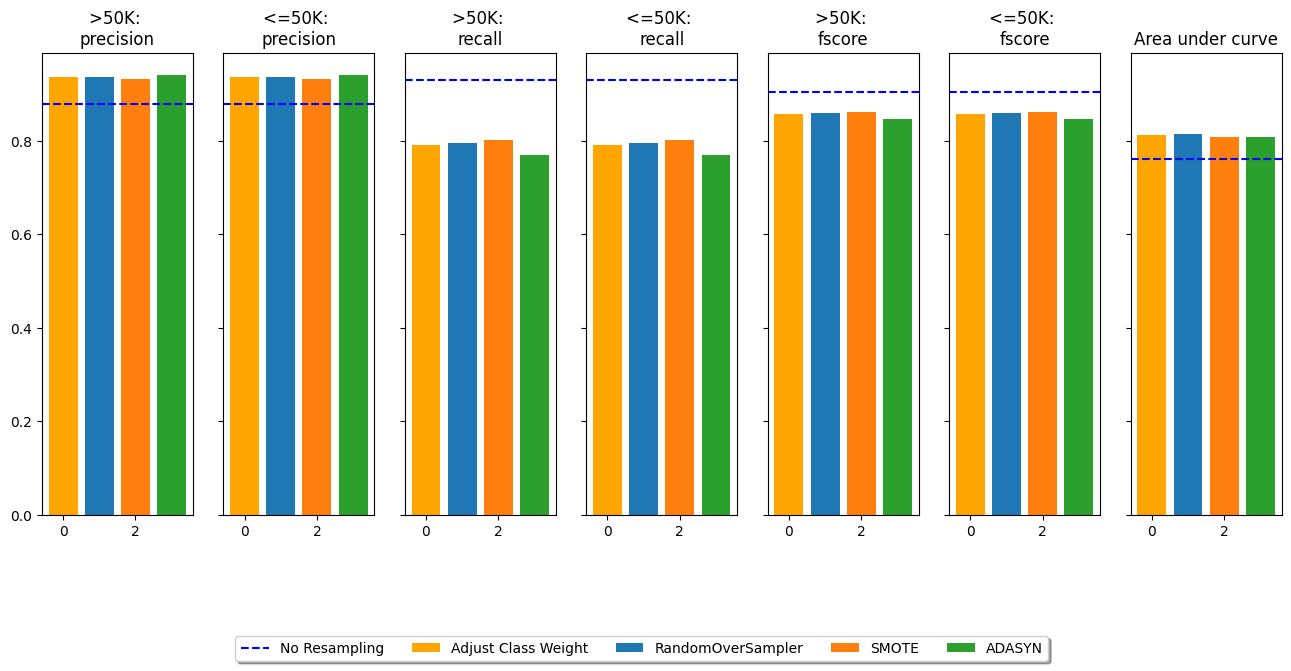

In [62]:
evaluate_method(results, 'oversample')

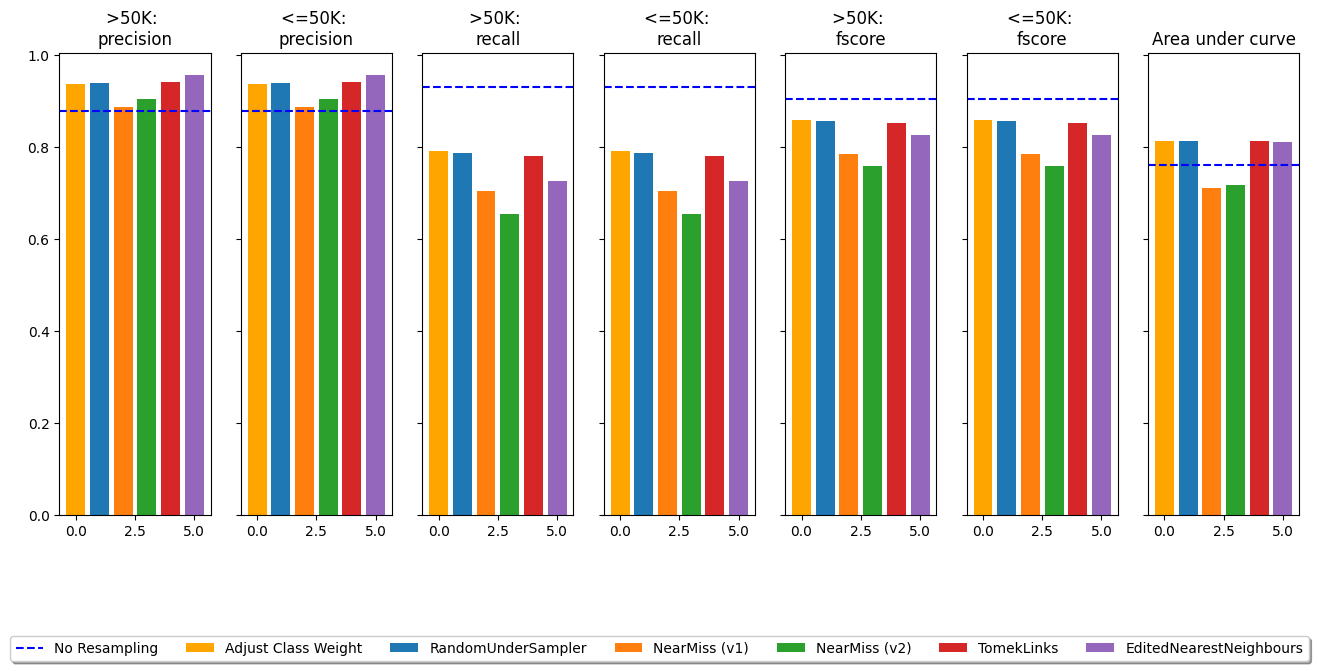

In [63]:
evaluate_method(results, 'undersample')

# Decision Tree

In [64]:
model = DecisionTreeClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

✅ Running Baseline Model Without Resampling...
✅ Running Model with Class Weight Balancing...

📢 Applying Oversampling Techniques...
🔹 RandomOverSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 SMOTE: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 ADASYN: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26517), (1, 26017)]

📢 Applying Undersampling Techniques...
🔹 RandomUnderSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v1): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v2): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 TomekLinks: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 24271)]
🔹 EditedNearestNeighbours: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 18983)]


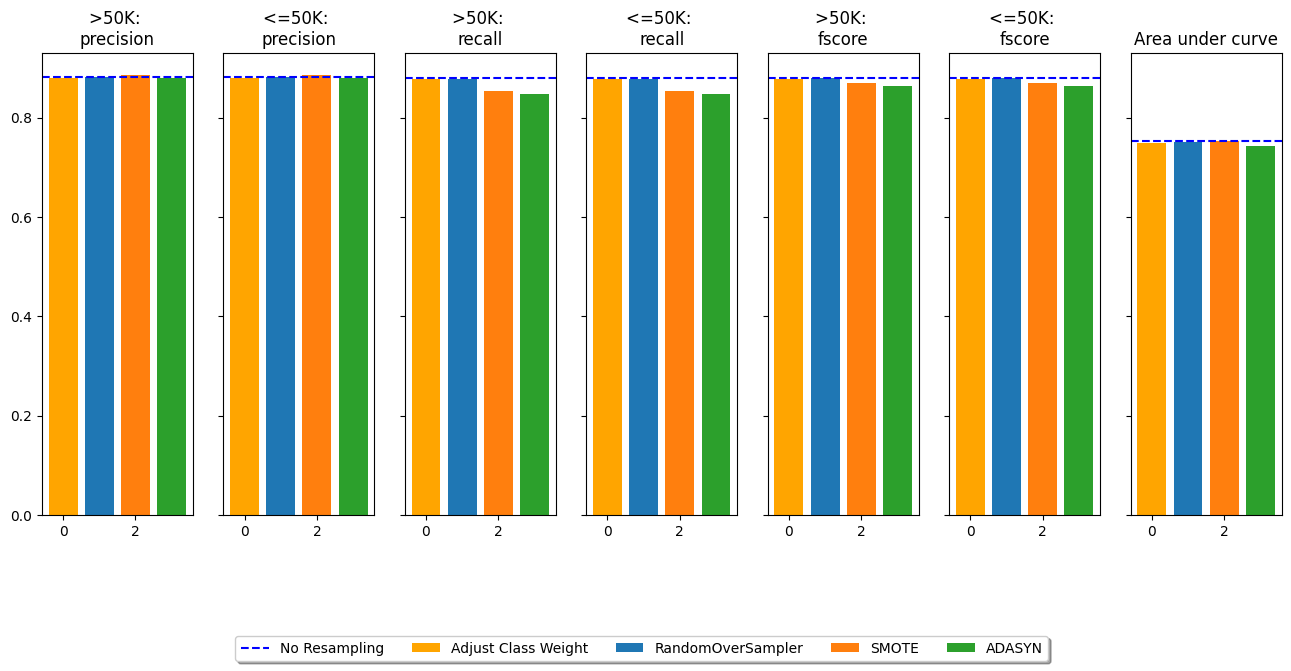

In [65]:
evaluate_method(results, 'oversample')

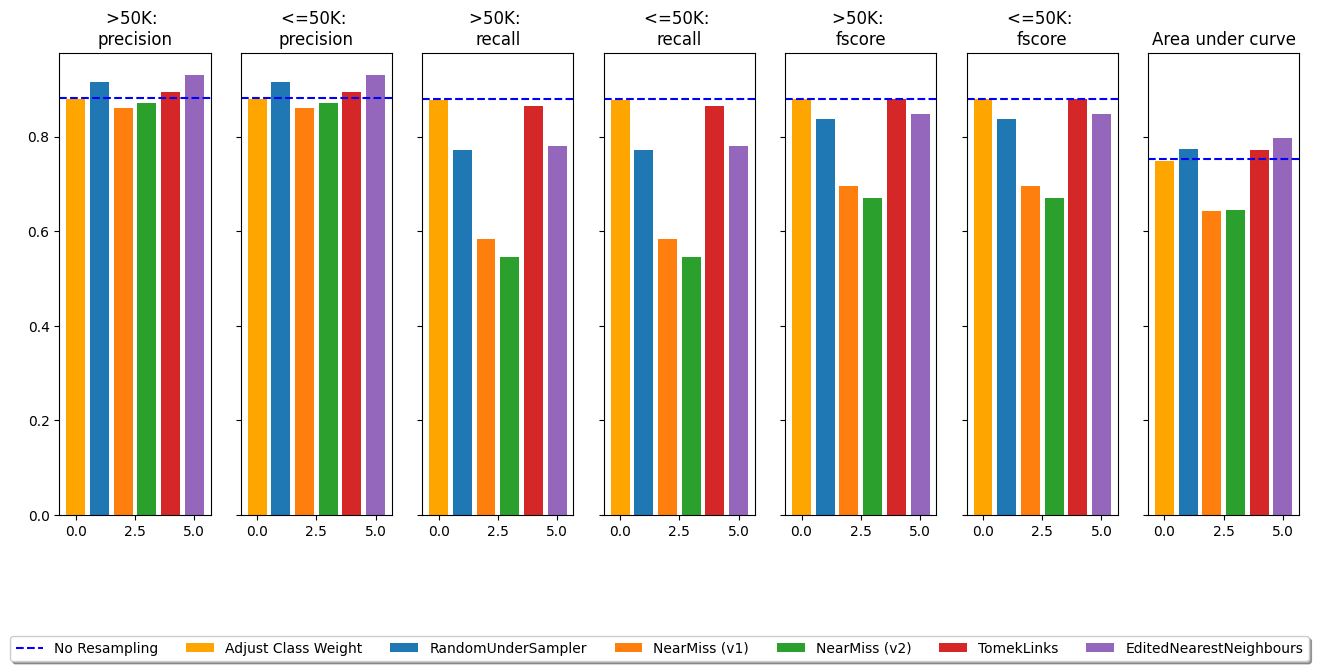

In [66]:
evaluate_method(results, 'undersample')

# Random Forests

In [67]:
model = RandomForestClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

✅ Running Baseline Model Without Resampling...
✅ Running Model with Class Weight Balancing...

📢 Applying Oversampling Techniques...
🔹 RandomOverSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 SMOTE: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 ADASYN: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26517), (1, 26017)]

📢 Applying Undersampling Techniques...
🔹 RandomUnderSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v1): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v2): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 TomekLinks: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 24271)]
🔹 EditedNearestNeighbours: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 18983)]


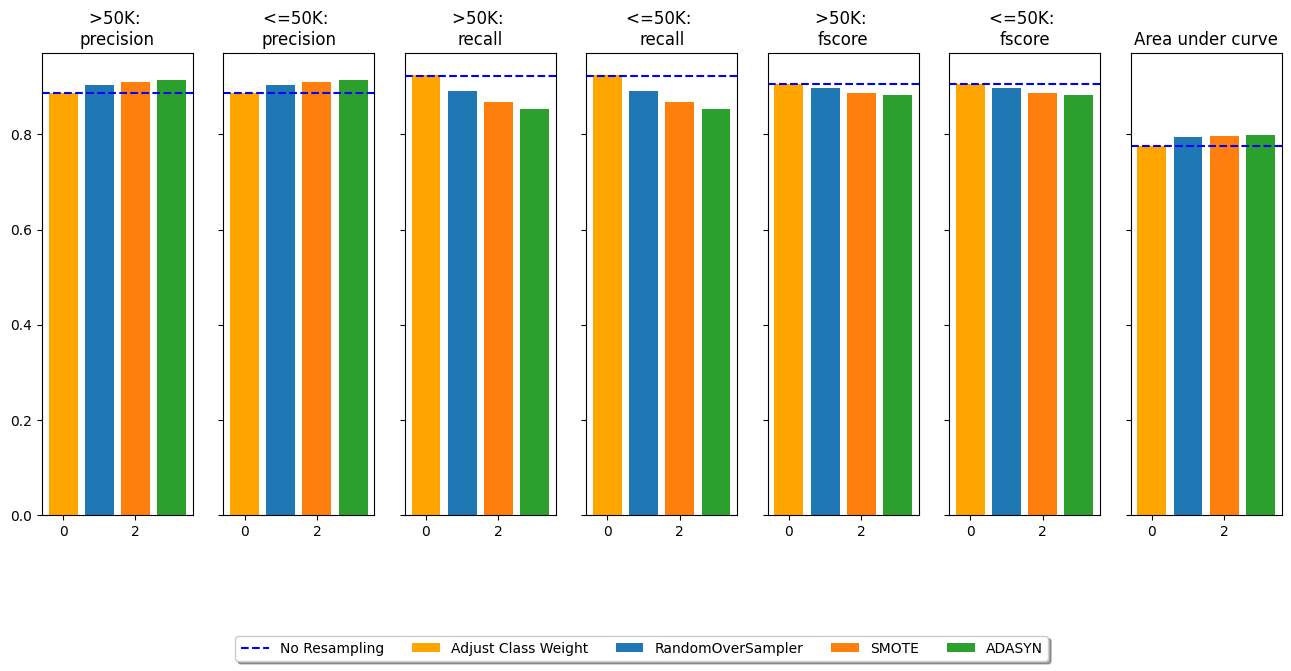

In [68]:
evaluate_method(results, 'oversample')

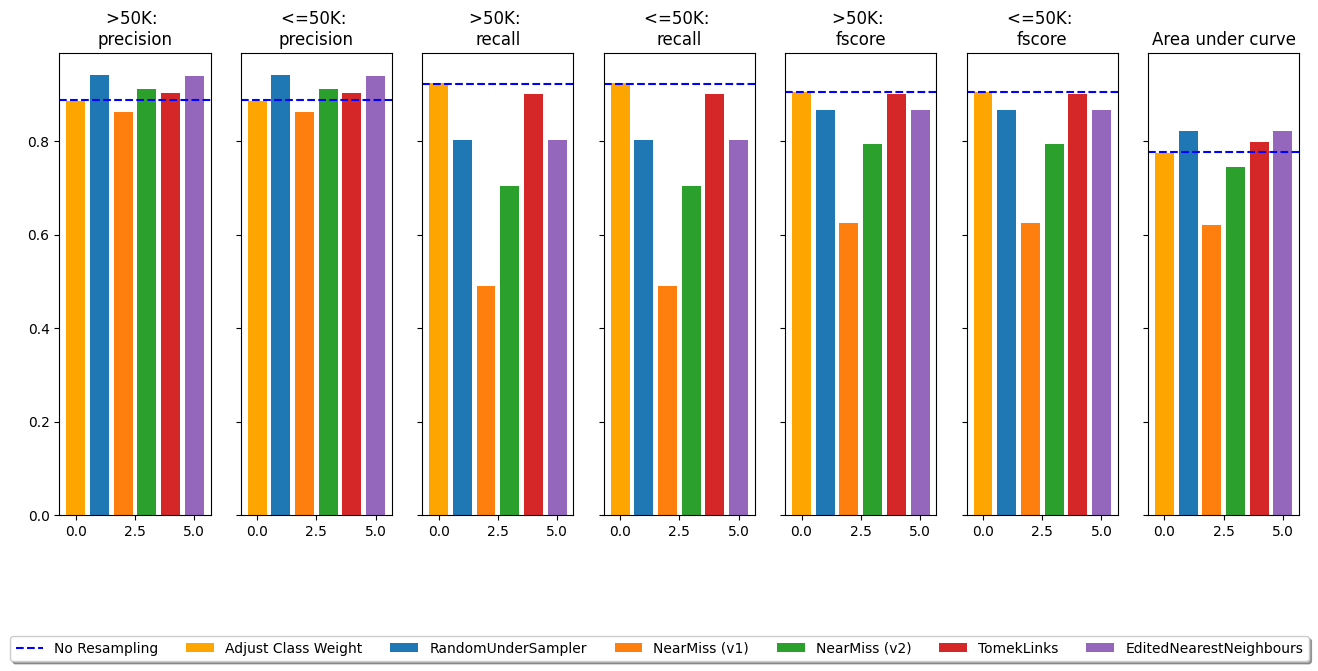

In [69]:
evaluate_method(results, 'undersample')

# Support Vector Classification

In [70]:
model = SVC()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

✅ Running Baseline Model Without Resampling...
✅ Running Model with Class Weight Balancing...

📢 Applying Oversampling Techniques...
🔹 RandomOverSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 SMOTE: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 ADASYN: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26517), (1, 26017)]

📢 Applying Undersampling Techniques...
🔹 RandomUnderSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v1): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v2): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 TomekLinks: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 24271)]
🔹 EditedNearestNeighbours: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 18983)]


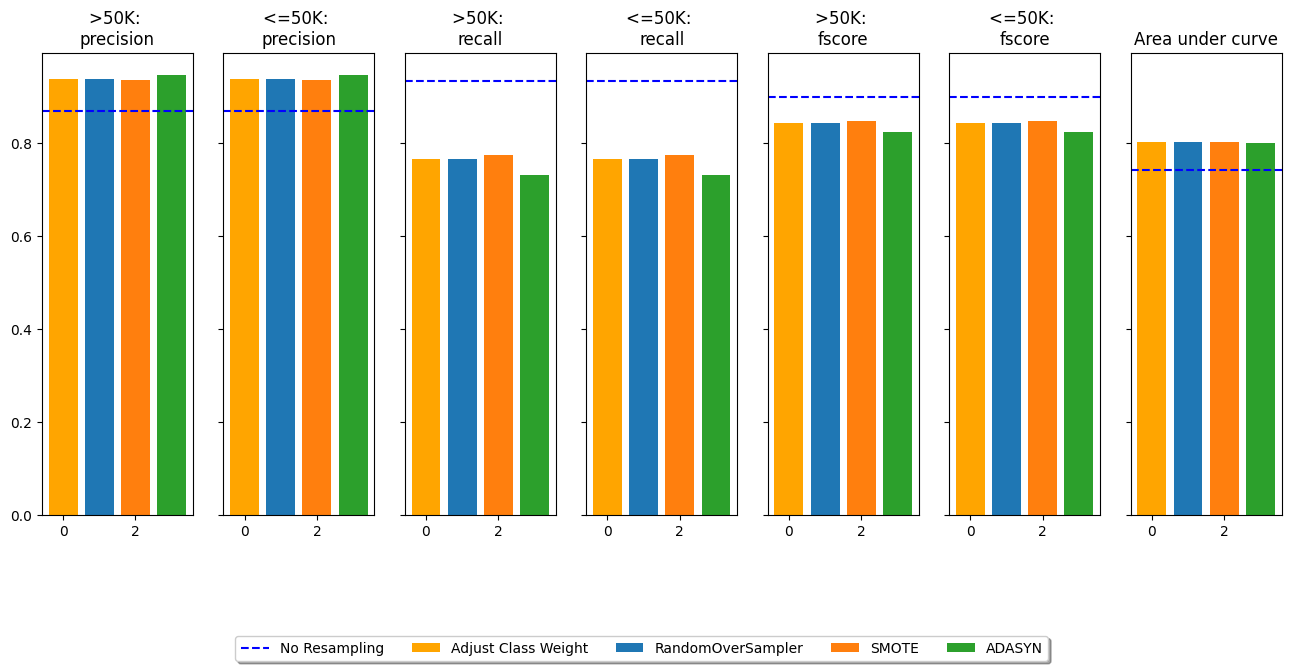

In [71]:
evaluate_method(results, 'oversample')

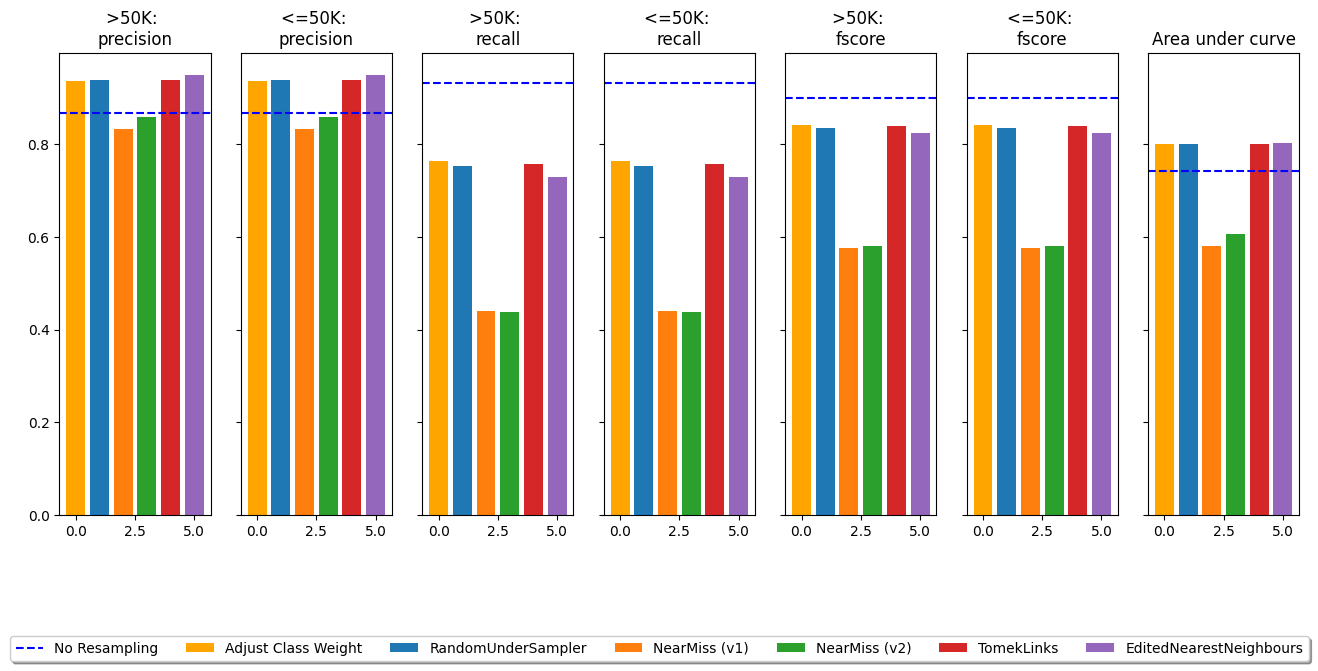

In [72]:
evaluate_method(results, 'undersample')

# K-nearest Neighbors

In [73]:
model = KNeighborsClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

✅ Running Baseline Model Without Resampling...

📢 Applying Oversampling Techniques...
🔹 RandomOverSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 SMOTE: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 ADASYN: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26517), (1, 26017)]

📢 Applying Undersampling Techniques...
🔹 RandomUnderSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v1): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v2): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 TomekLinks: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 24271)]
🔹 EditedNearestNeighbours: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 18983)]


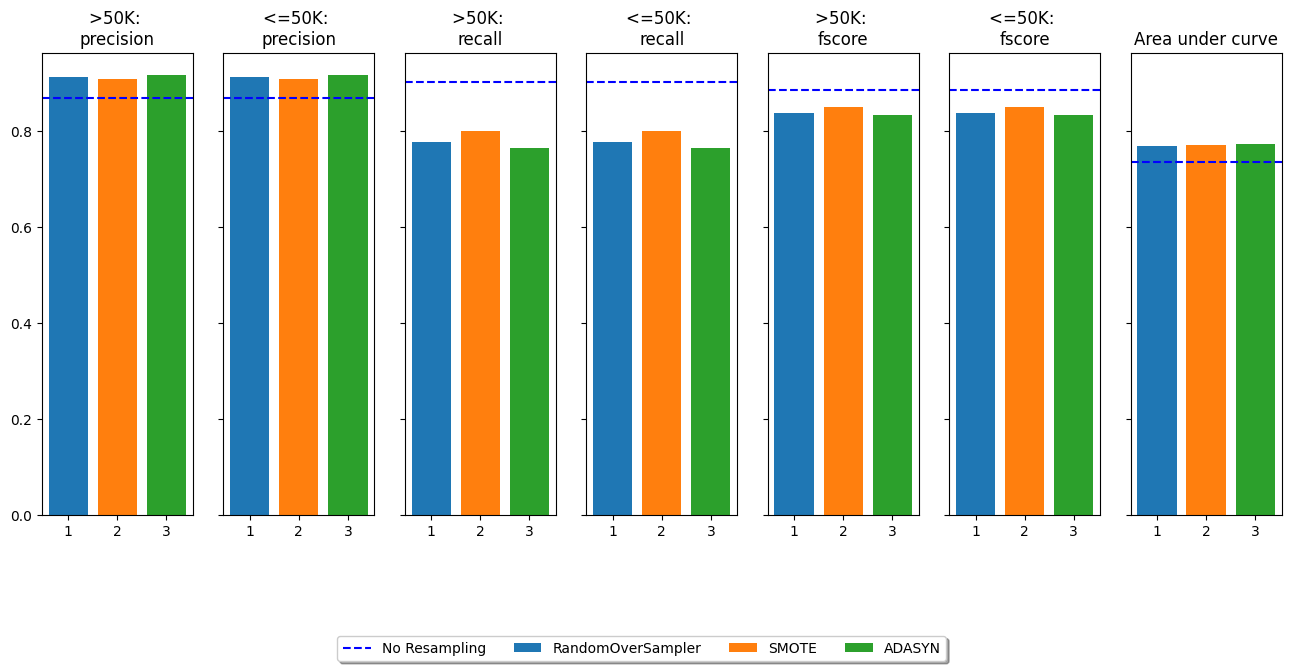

In [74]:
evaluate_method(results, 'oversample')

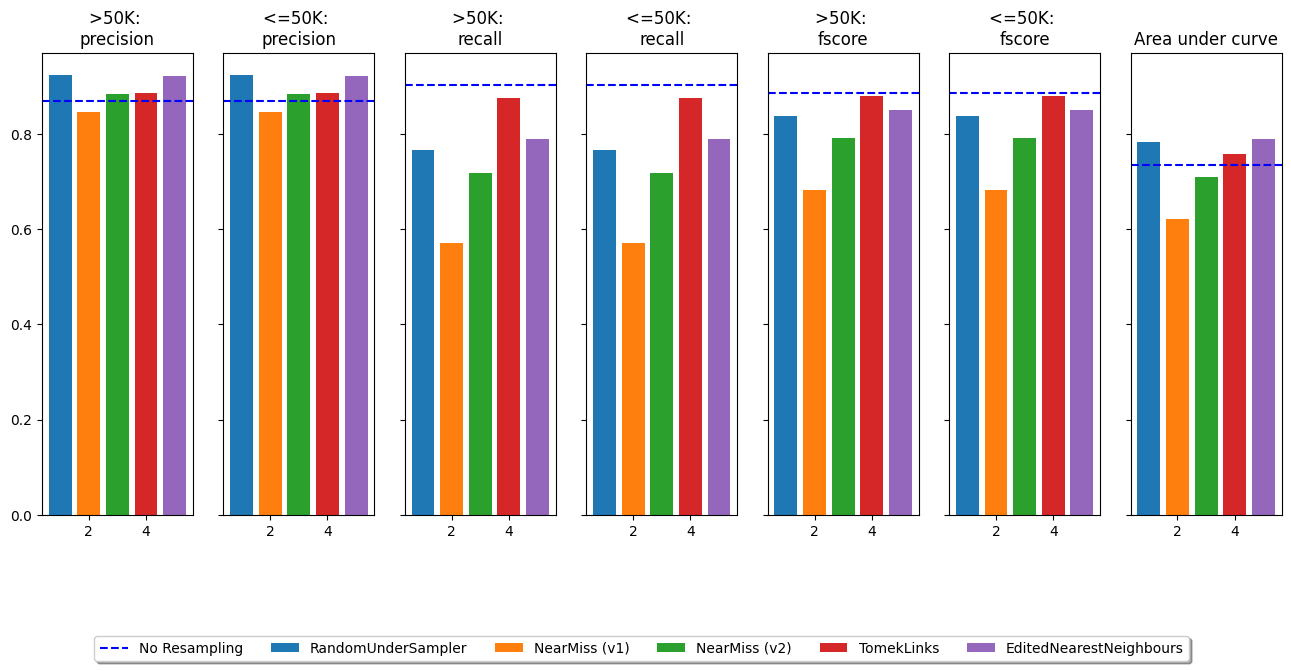

In [75]:
evaluate_method(results, 'undersample')

# Gaussian Naive Bayes

In [76]:
model=GaussianNB()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

✅ Running Baseline Model Without Resampling...

📢 Applying Oversampling Techniques...
🔹 RandomOverSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 SMOTE: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 ADASYN: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26517), (1, 26017)]

📢 Applying Undersampling Techniques...
🔹 RandomUnderSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v1): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v2): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 TomekLinks: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 24271)]
🔹 EditedNearestNeighbours: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 18983)]


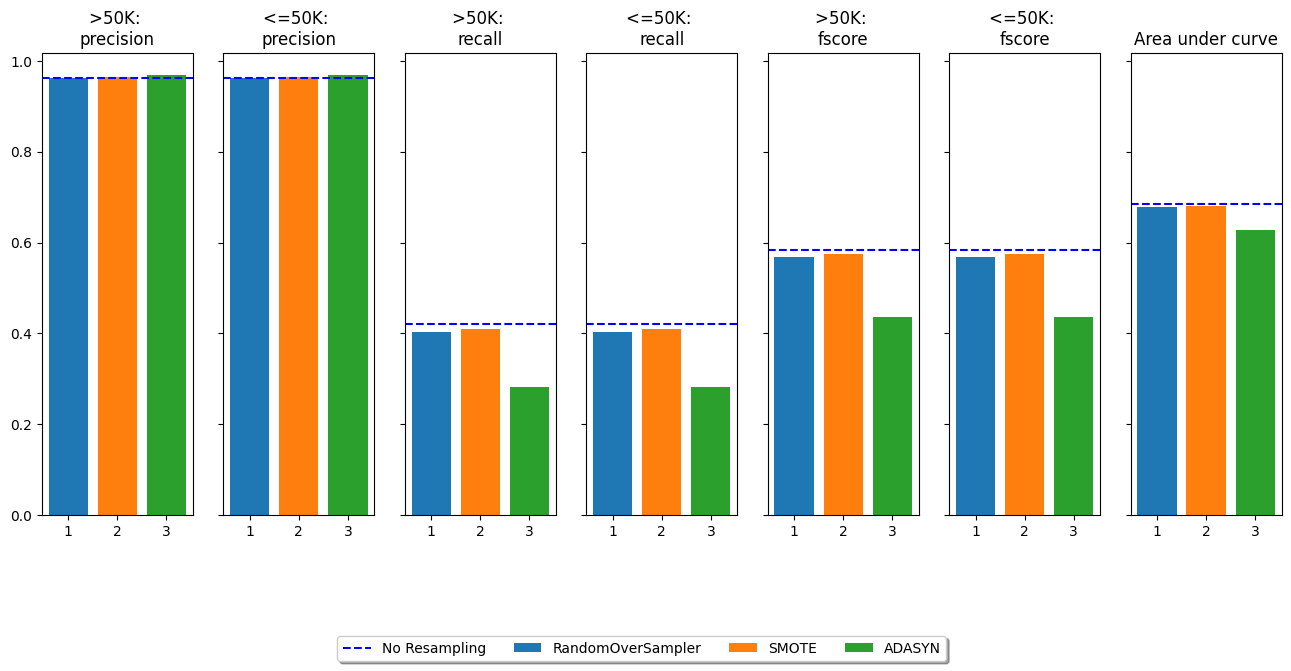

In [77]:
evaluate_method(results, 'oversample')

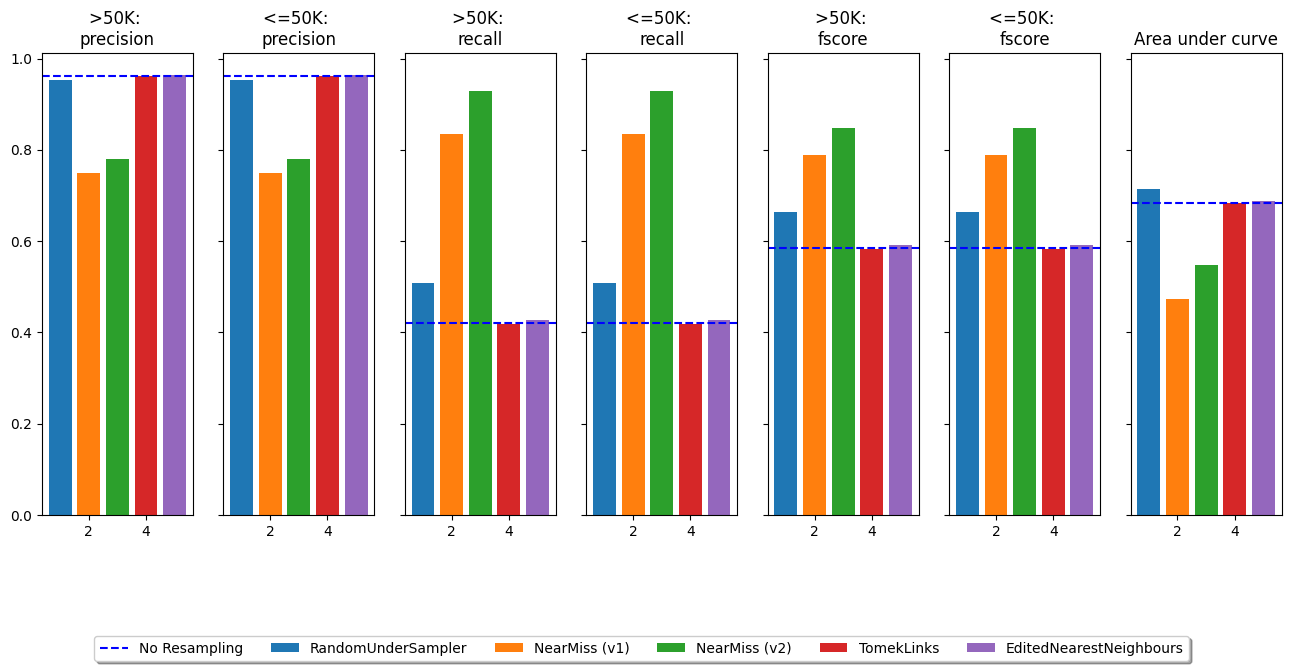

In [78]:
evaluate_method(results, 'undersample')

# Quadratic Discriminant Analysis

In [79]:
model= QuadraticDiscriminantAnalysis()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

✅ Running Baseline Model Without Resampling...

📢 Applying Oversampling Techniques...
🔹 RandomOverSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 SMOTE: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 ADASYN: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26517), (1, 26017)]

📢 Applying Undersampling Techniques...
🔹 RandomUnderSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v1): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v2): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 TomekLinks: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 24271)]
🔹 EditedNearestNeighbours: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 18983)]


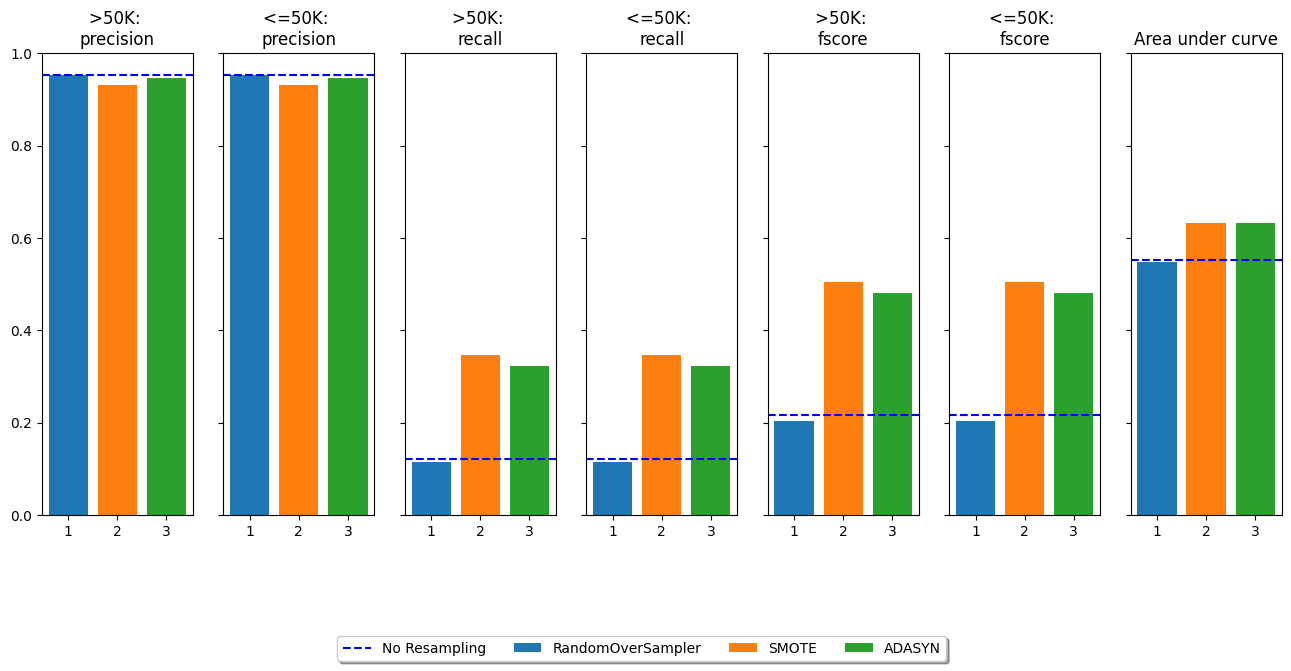

In [80]:
evaluate_method(results, 'oversample')

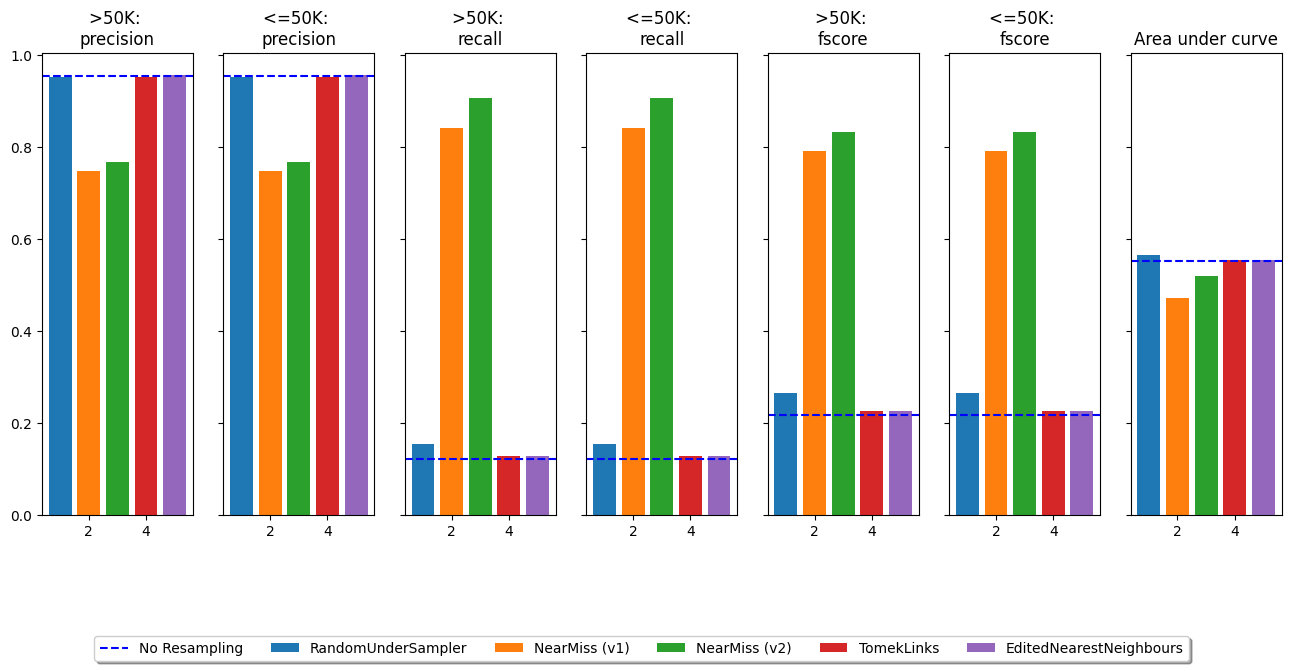

In [81]:
evaluate_method(results, 'undersample')

# AdaBoost

In [82]:
model = AdaBoostClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

✅ Running Baseline Model Without Resampling...

📢 Applying Oversampling Techniques...
🔹 RandomOverSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 SMOTE: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 ADASYN: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26517), (1, 26017)]

📢 Applying Undersampling Techniques...
🔹 RandomUnderSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v1): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v2): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 TomekLinks: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 24271)]
🔹 EditedNearestNeighbours: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 18983)]


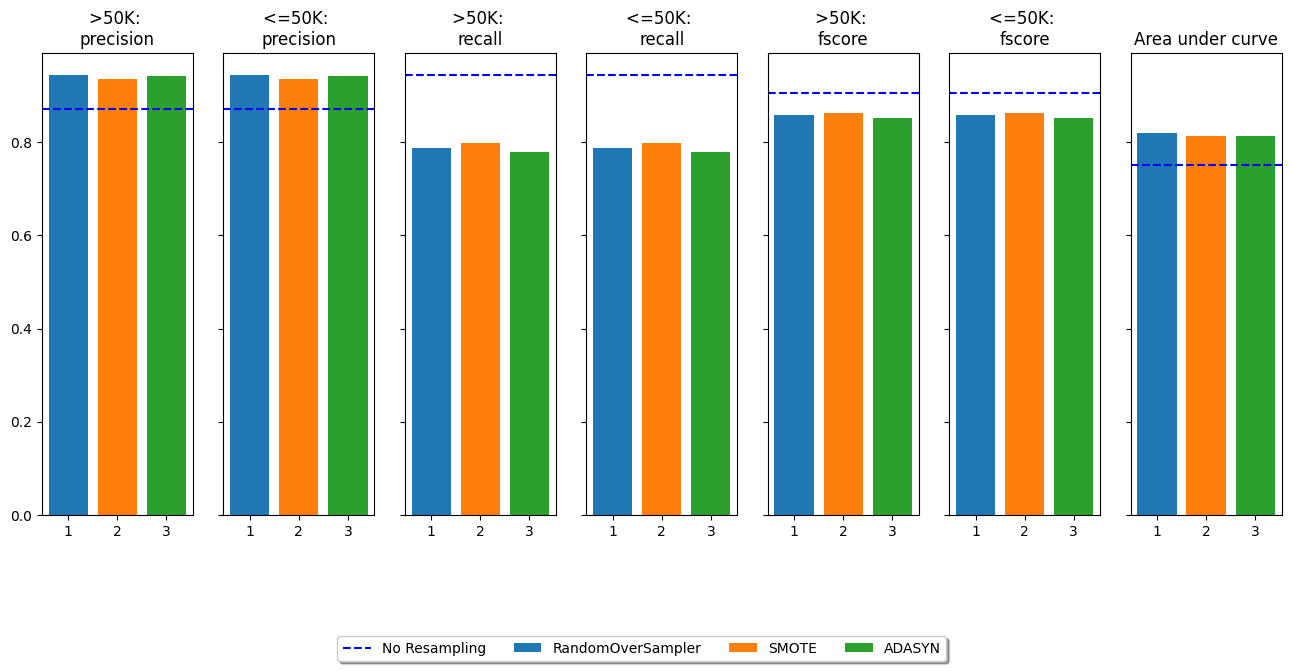

In [83]:
evaluate_method(results, 'oversample')

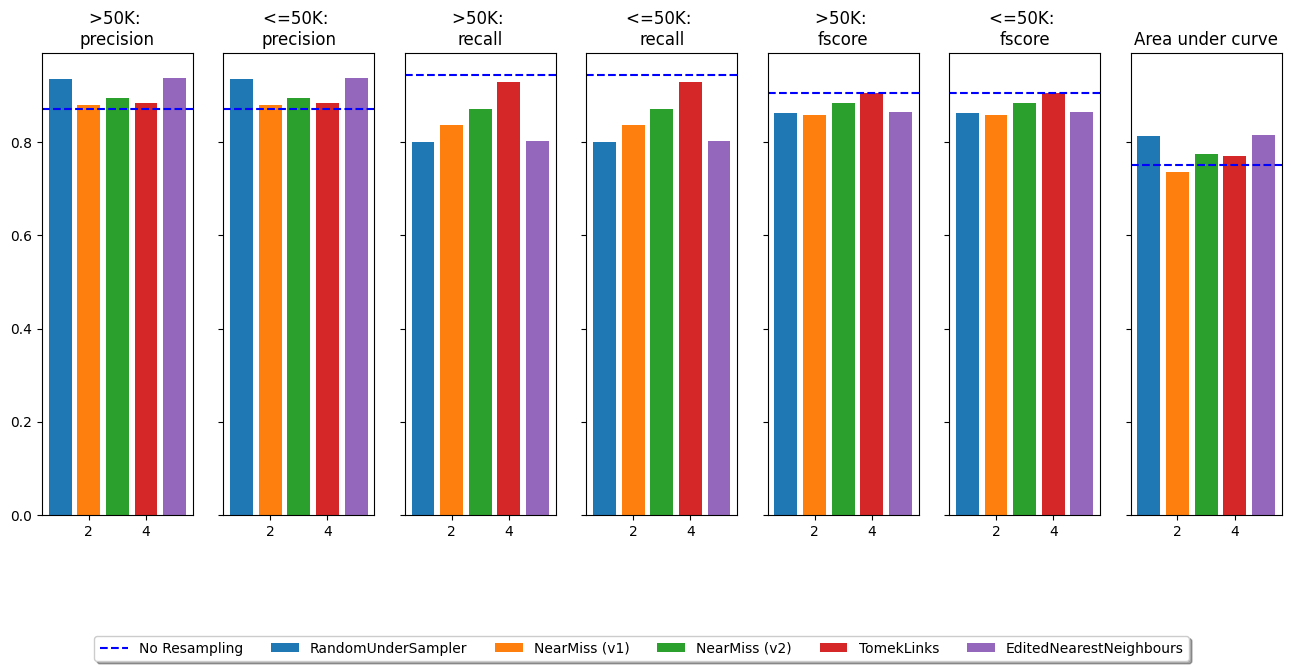

In [84]:
evaluate_method(results, 'undersample')

# Gradient Boosting

In [85]:
model=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

✅ Running Baseline Model Without Resampling...

📢 Applying Oversampling Techniques...
🔹 RandomOverSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 SMOTE: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 ADASYN: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26517), (1, 26017)]

📢 Applying Undersampling Techniques...
🔹 RandomUnderSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v1): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v2): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 TomekLinks: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 24271)]
🔹 EditedNearestNeighbours: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 18983)]


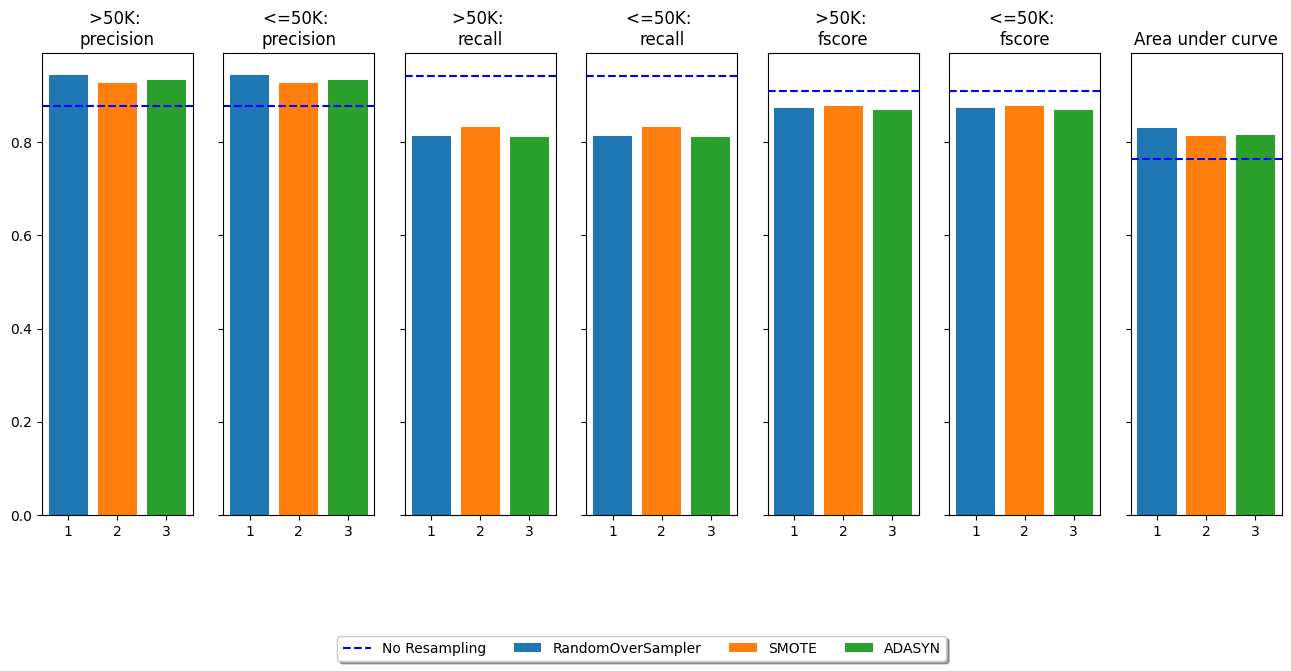

In [86]:
evaluate_method(results, 'oversample')

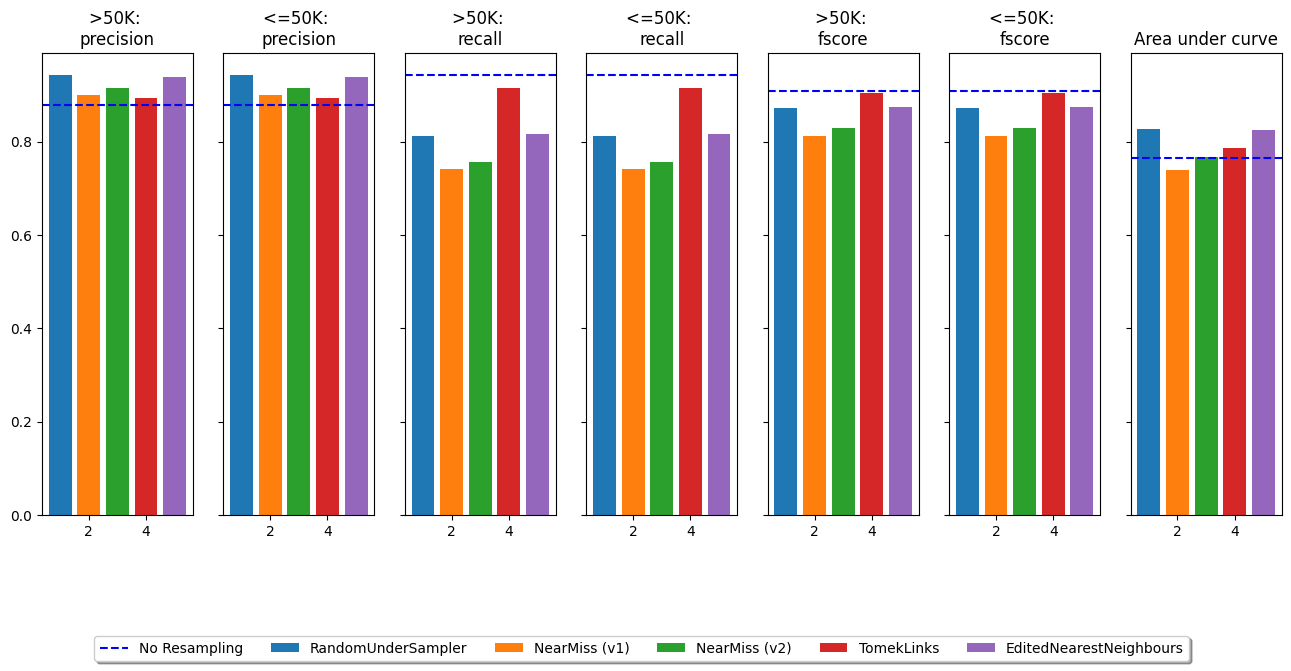

In [87]:
evaluate_method(results, 'undersample')

# Multi-layer Perceptron Classifier

In [88]:
model = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='lbfgs')
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

✅ Running Baseline Model Without Resampling...

📢 Applying Oversampling Techniques...
🔹 RandomOverSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 SMOTE: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26017), (1, 26017)]
🔹 ADASYN: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 26517), (1, 26017)]

📢 Applying Undersampling Techniques...
🔹 RandomUnderSampler: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v1): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 NearMiss (v2): Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 8172)]
🔹 TomekLinks: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 24271)]
🔹 EditedNearestNeighbours: Before = [(0, 8172), (1, 26017)]
   ➡ After = [(0, 8172), (1, 18983)]


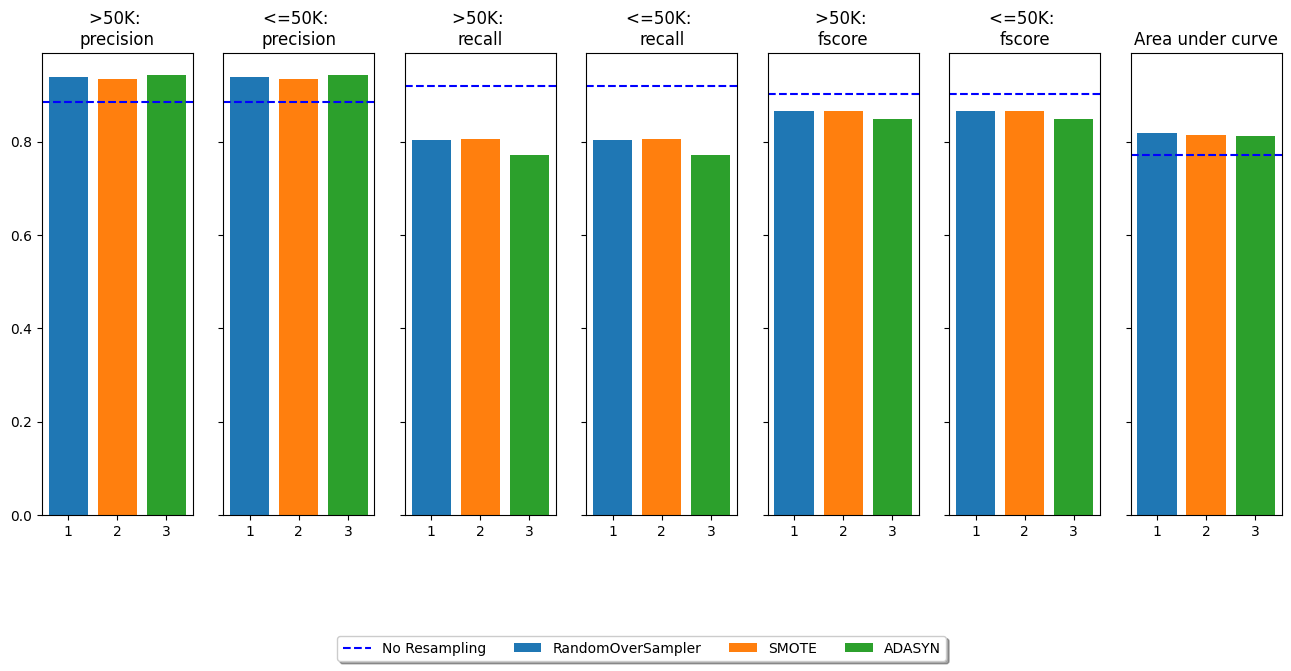

In [89]:
evaluate_method(results, 'oversample')

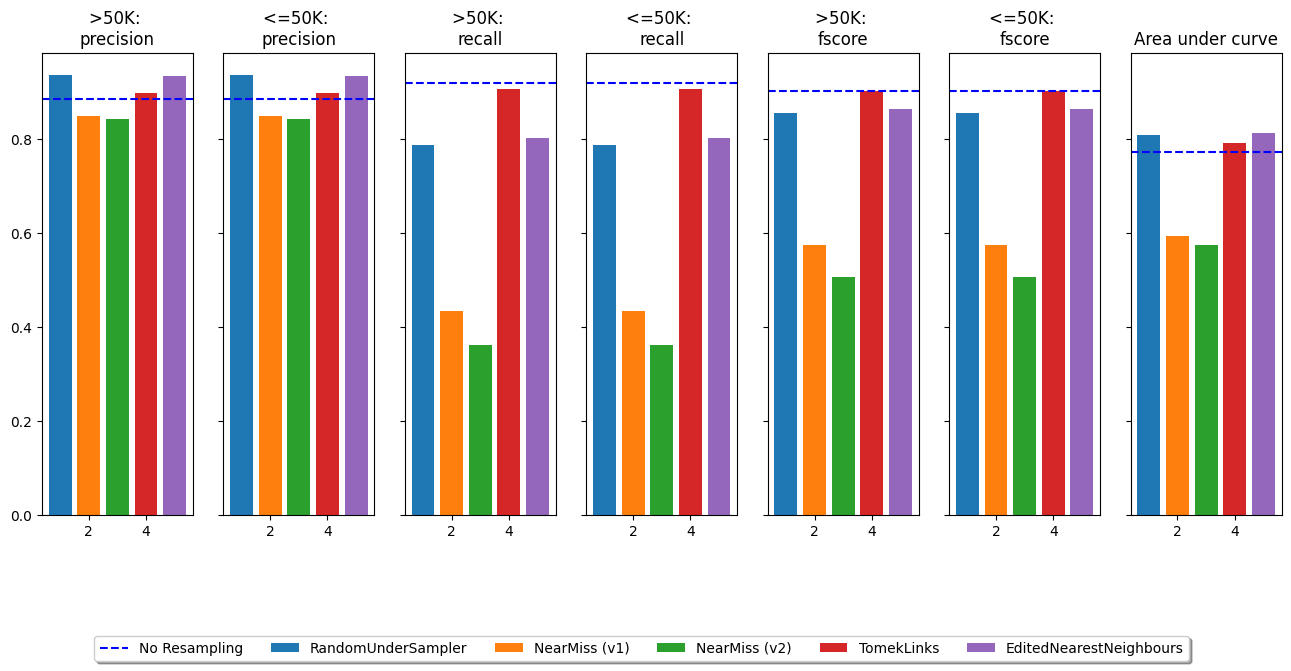

In [90]:
evaluate_method(results, 'undersample')